# Step 1: Business case - Heart Disease Prediction
- Project objective is to build a model to predict whether a patient have heart disease or not.
- Since dataset we using here is labeled, it falls under Supervised learning method.
- It is a binary classification because output is categorical with 0(no disease) and 1(have disease) labels. 
- Success of model lays in how much it can correctly classify positive(1) cases because the domain is healthcare so need much attention to make sure positive cases are classified properly and not or least misclassification happened. Therefore model having high recall score would be best model.

## Domain Analysis:
Heart disease is the number one cause of death worldwide. To learn how to prevent heart disease we must first learn to reliably detect it. Preventing heart disease is important. Good data-driven systems for predicting heart disease can improve the entire research and prevention process, making sure that more people can live healthy lives. United States, according to website of Centers for Disease Control and Prevention:
- About 610,000 people die of heart disease in the United States every year–that’s 1 in every 4 deaths.
- Heart disease is the leading cause of death for both men and women. More than half of the deaths due to heart disease in 2009 were in men.
- Coronary heart disease (CHD) is the most common type of heart disease, killing over 370,000 people annually.
- Every year about 735,000 Americans have a heart attack. Of these, 525,000 are a first heart attack and 210,000 happen in people who have already had a heart attack.
- Heart disease is the leading cause of death for people of most ethnicities in the United States, including African Americans, Hispanics, and whites. For American Indians or Alaska Natives and Asians or Pacific Islanders, heart disease is second only to cancer.

**Risk factors for developing heart disease include**
- Age: Growing older increases your risk of damaged and narrowed arteries and a weakened or thickened heart muscle.
- Sex: Men are generally at greater risk of heart disease. The risk for women increases after menopause.
- Family history: A family history of heart disease increases your risk of coronary artery disease, especially if a parent developed it at an early age (before age 55 for a male relative, such as your brother or father, and 65 for a female relative, such as your mother or sister).
- Smoking: Nicotine tightens your blood vessels, and carbon monoxide can damage their inner lining, making them more susceptible to atherosclerosis. Heart attacks are more common in smokers than in nonsmokers.
- Poor diet: A diet that's high in fat, salt, sugar and cholesterol can contribute to the development of heart disease.
- High blood pressure: Uncontrolled high blood pressure can result in hardening and thickening of your arteries, narrowing the vessels through which blood flows.
- High blood cholesterol levels: High levels of cholesterol in your blood can increase the risk of plaque formation and atherosclerosis.
- Diabetes: Diabetes increases your risk of heart disease. Both conditions share similar risk factors, such as obesity and high blood pressure.
- Obesity: Excess weight typically worsens other heart disease risk factors.
- Physical inactivity: Lack of exercise also is associated with many forms of heart disease and some of its other risk factors as well.
- Stress: Unrelieved stress may damage your arteries and worsen other risk factors for heart disease.
- Poor dental health: It's important to brush and floss your teeth and gums often, and have regular dental checkups. If your teeth and gums aren't healthy, germs can enter your bloodstream and travel to your heart, causing endocarditis.

# Step 2 : Data Collection
Dataset https://www.drivendata.org/competitions/54/machine-learning-with-a-heart/page/107/.
This dataset is from a study of heart disease that has been open to the public for many years. The study collects various measurements on patient health and cardiovascular statistics, and of course makes patient identities anonymous.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
labels = pd.read_csv('labels.csv')
labels

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


In [3]:
values = pd.read_csv('values.csv')
values

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [4]:
data = pd.concat([values, labels.drop(['patient_id'], axis=1)], axis=1)
data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


# Step 3 : Identifying the independent and dependent variable.
### Input features:
There are 14 columns in the dataset

- **patient_id:** is a unique and random identifier.

- **slope_of_peak_exercise_st_segment (type: int):** the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart. => (categorical ordinal type)

- **thal (type: categorical):** results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect. => (categorical nominal type)

- **resting_blood_pressure (type: int):** resting blood pressure. => (numerical continous type)

- **chest_pain_type (type: int):** chest pain type (4 values). => (categorical nominal type)

- **num_major_vessels (type: int):** number of major vessels (0-3) colored by flourosopy. => (numerical discrete type)

- **fasting_blood_sugar_gt_120_mg_per_dl (type: binary):** fasting blood sugar > 120 mg/dl. => (categorical nominal type)

- **resting_ekg_results (type: int):** resting electrocardiographic results (values 0,1,2). => (categorical nominal type)

- **serum_cholesterol_mg_per_dl (type: int):** serum cholestoral in mg/dl. => (numerical continous type)

- **oldpeak_eq_st_depression (type: float):** oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms => (numerical continous type)

- **sex (type: binary):** 0: female, 1: male => (categorical nominal type)

- **age (type: int):** age in years => (numerical continous type)

- **max_heart_rate_achieved (type: int):** maximum heart rate achieved (beats per minute) => (numerical continous type)

- **exercise_induced_angina (type: binary):** exercise-induced chest pain (0: False, 1: True) => (categorical nominal type)

### Output:
- **heart_disease_present**, which represents whether or not a patient has heart disease: => (categorical nominal type)
   - 0 represents no heart disease present
   - 1 represents heart disease present


# Step 4 : EDA
## Basic checks

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [6]:
data.nunique()

patient_id                              180
slope_of_peak_exercise_st_segment         3
thal                                      3
resting_blood_pressure                   36
chest_pain_type                           4
num_major_vessels                         4
fasting_blood_sugar_gt_120_mg_per_dl      2
resting_ekg_results                       3
serum_cholesterol_mg_per_dl             118
oldpeak_eq_st_depression                 34
sex                                       2
age                                      40
max_heart_rate_achieved                  73
exercise_induced_angina                   2
heart_disease_present                     2
dtype: int64

We can omit feature 'patient_id' since it is a unique and random feature.

From above, we can say there are 6 numerical features; 'resting_blood_pressure', 'num_major_vessels', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'age' and 'max_heart_rate_achieved' out of 5 features are continous type.

There are 8 categorical features(including outpu); 'slope_of_peak_exercise_st_segment', 'thal', 'chest_pain_type', 'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results', 'sex', 'exercise_induced_angina' and 'heart_disease_present'(output). Feature 'thal' is the only categorical feature having text values rest are in numbers.

In [7]:
data.thal.value_counts(normalize=True).mul(100).round(2)

normal               54.44
reversible_defect    41.11
fixed_defect          4.44
Name: thal, dtype: float64

In [8]:
## get all categorical (or descrete) features
cat_num_feat = [feat for feat in data.columns[1:] if (data[feat].dtype!='object') and (data[feat].nunique()<5)]
cat_num_feat

['slope_of_peak_exercise_st_segment',
 'chest_pain_type',
 'num_major_vessels',
 'fasting_blood_sugar_gt_120_mg_per_dl',
 'resting_ekg_results',
 'sex',
 'exercise_induced_angina',
 'heart_disease_present']

In [9]:
for i in cat_num_feat:
    print(data[i].value_counts(normalize=True).mul(100).round(2), '\n')

1    51.67
2    41.67
3     6.67
Name: slope_of_peak_exercise_st_segment, dtype: float64 

4    45.56
3    31.67
2    15.56
1     7.22
Name: chest_pain_type, dtype: float64 

0    58.89
1    20.56
2    12.78
3     7.78
Name: num_major_vessels, dtype: float64 

0    83.89
1    16.11
Name: fasting_blood_sugar_gt_120_mg_per_dl, dtype: float64 

2    52.22
0    47.22
1     0.56
Name: resting_ekg_results, dtype: float64 

1    68.89
0    31.11
Name: sex, dtype: float64 

0    68.33
1    31.67
Name: exercise_induced_angina, dtype: float64 

0    55.56
1    44.44
Name: heart_disease_present, dtype: float64 



In [10]:
## get all numerical continous features
num_cont_feat = [feat for feat in data.columns[1:] if (data[feat].dtype!='object') and (feat not in cat_num_feat)]
num_cont_feat

['resting_blood_pressure',
 'serum_cholesterol_mg_per_dl',
 'oldpeak_eq_st_depression',
 'age',
 'max_heart_rate_achieved']

In [11]:
data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [12]:
data.thal.describe(include='O')

count        180
unique         3
top       normal
freq          98
Name: thal, dtype: object

In [13]:
import matplotlib.pyplot as plt
import seaborn as sb
import sweetviz as sv

## Univariate Analysis

In [14]:
report = sv.analyze(data)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Categorical univariate anaysis

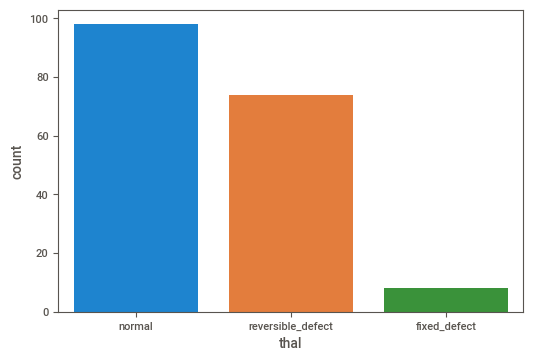

In [15]:
sb.countplot(x='thal', data=data)
plt.show()

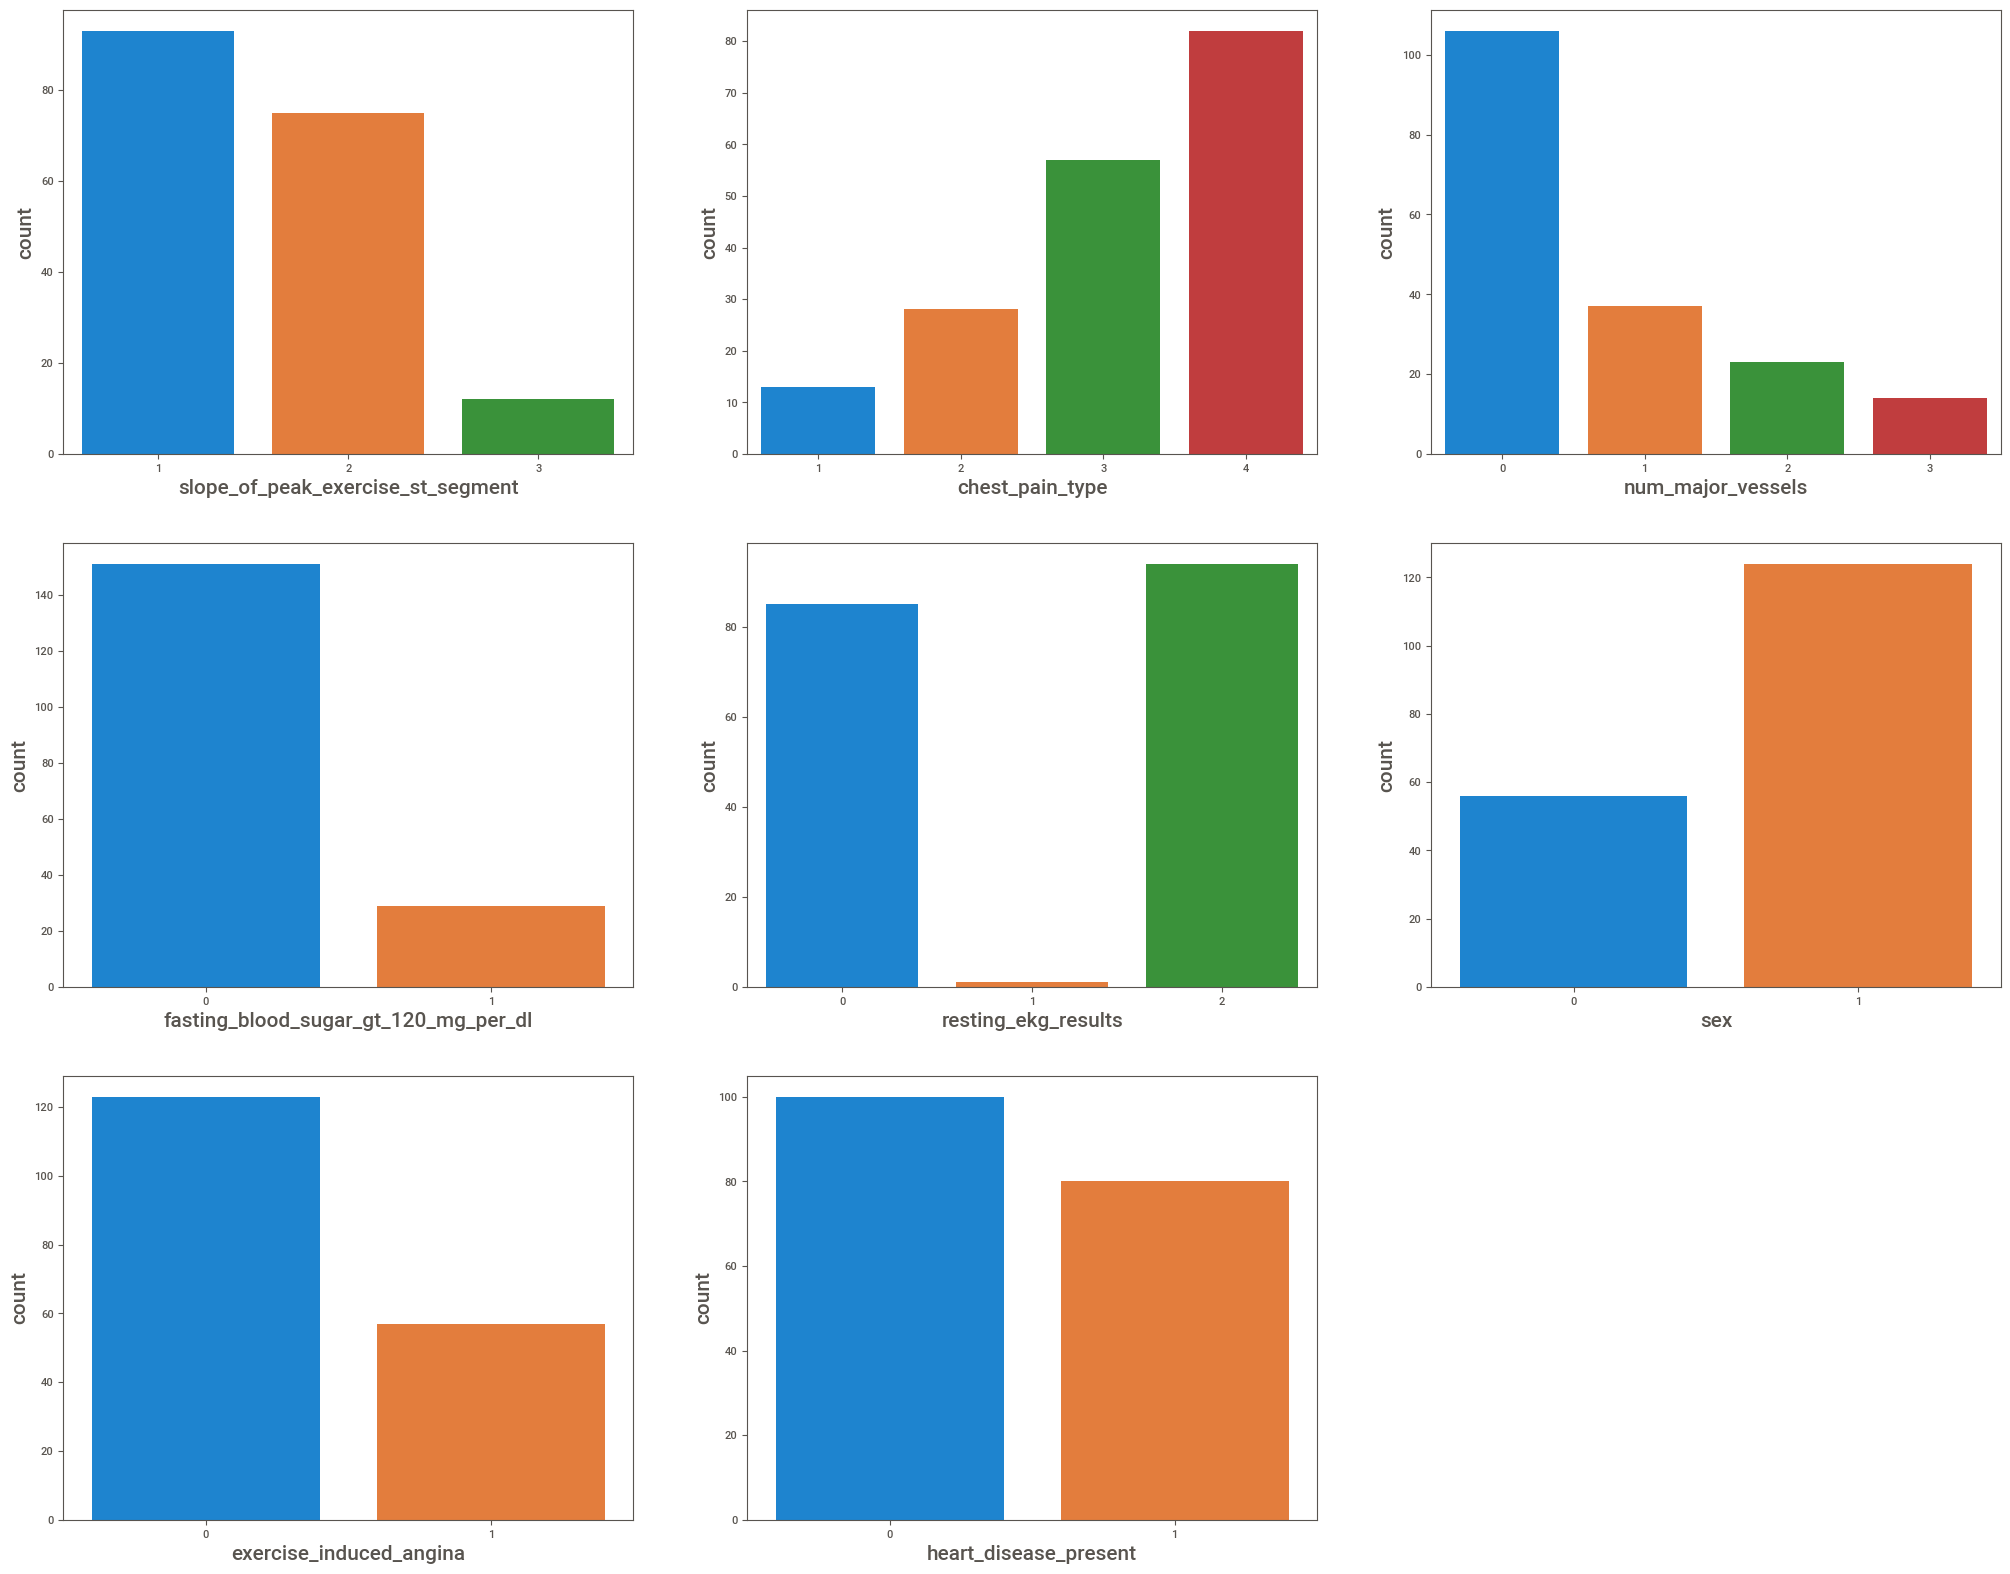

In [16]:
plt.figure(figsize=(25, 20))
plt_num=1
for feat in cat_num_feat:
    if plt_num<=len(cat_num_feat):
        plt.subplot(3, 3, plt_num)
        sb.countplot(x=feat, data=data)
        plt.xlabel(feat, fontsize=15)
        plt.ylabel('count', fontsize=15)
        plt_num+=1
plt.show()

### Continous univariate anaysis

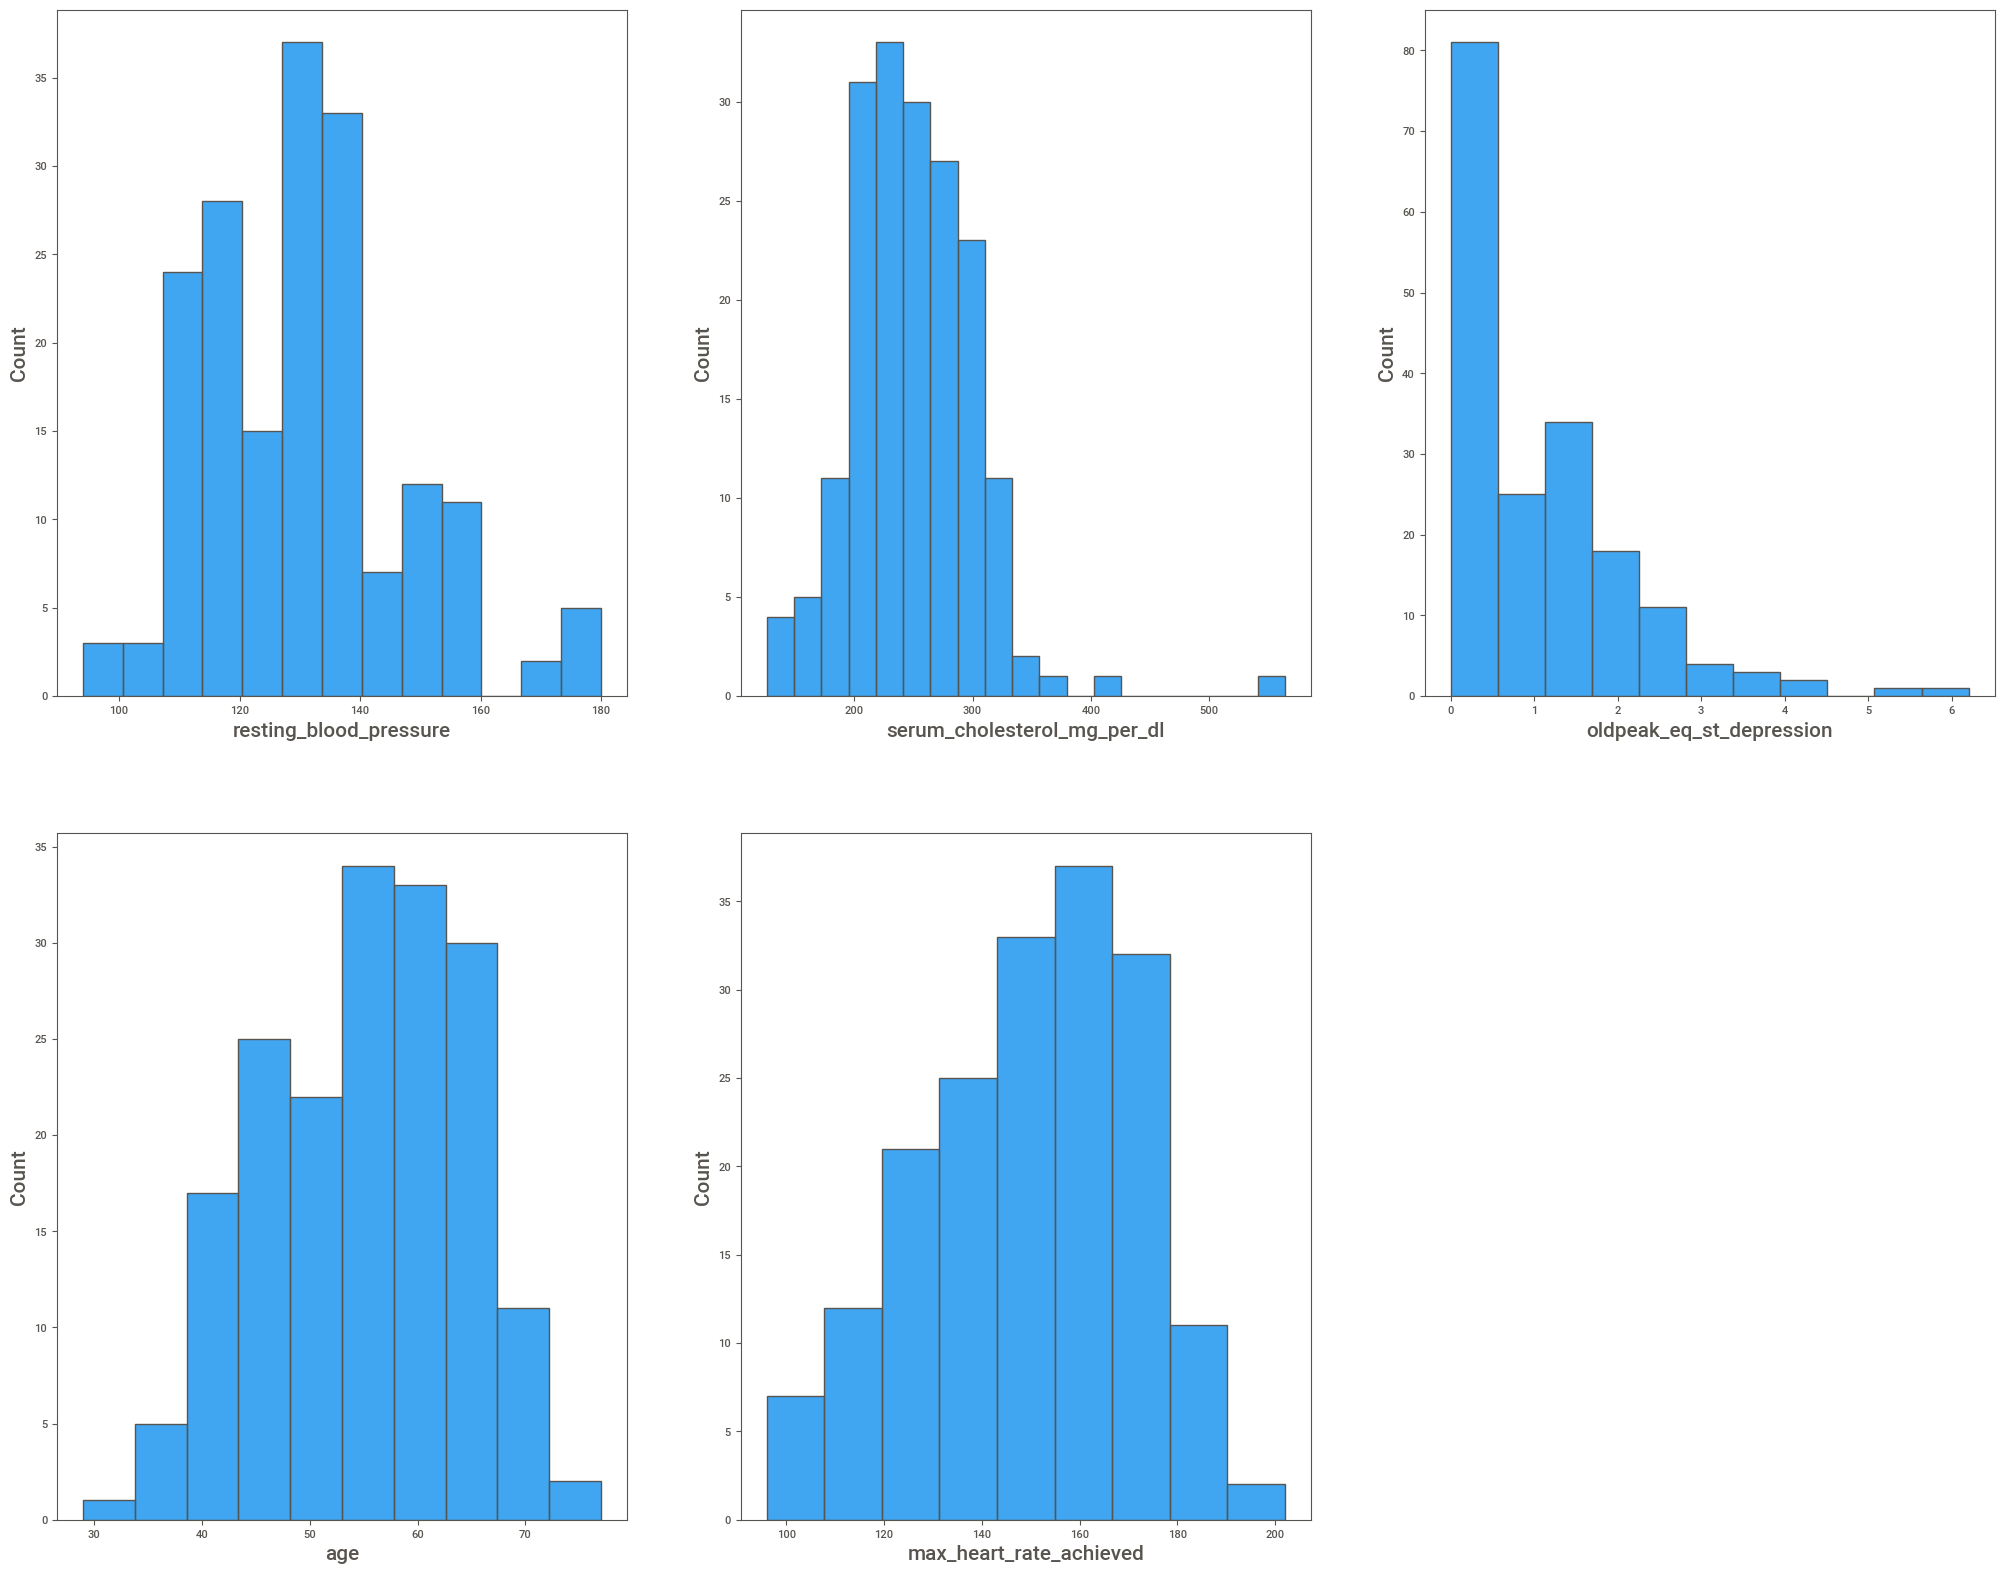

In [17]:
plt.figure(figsize=(25, 20))
plt_num=1
for feat in num_cont_feat:
    if plt_num<=len(num_cont_feat):
        plt.subplot(2, 3, plt_num)
        sb.histplot(x=feat, data=data)
        plt.xlabel(feat, fontsize=15)
        plt.ylabel('Count', fontsize=15)
        plt_num+=1
plt.show()

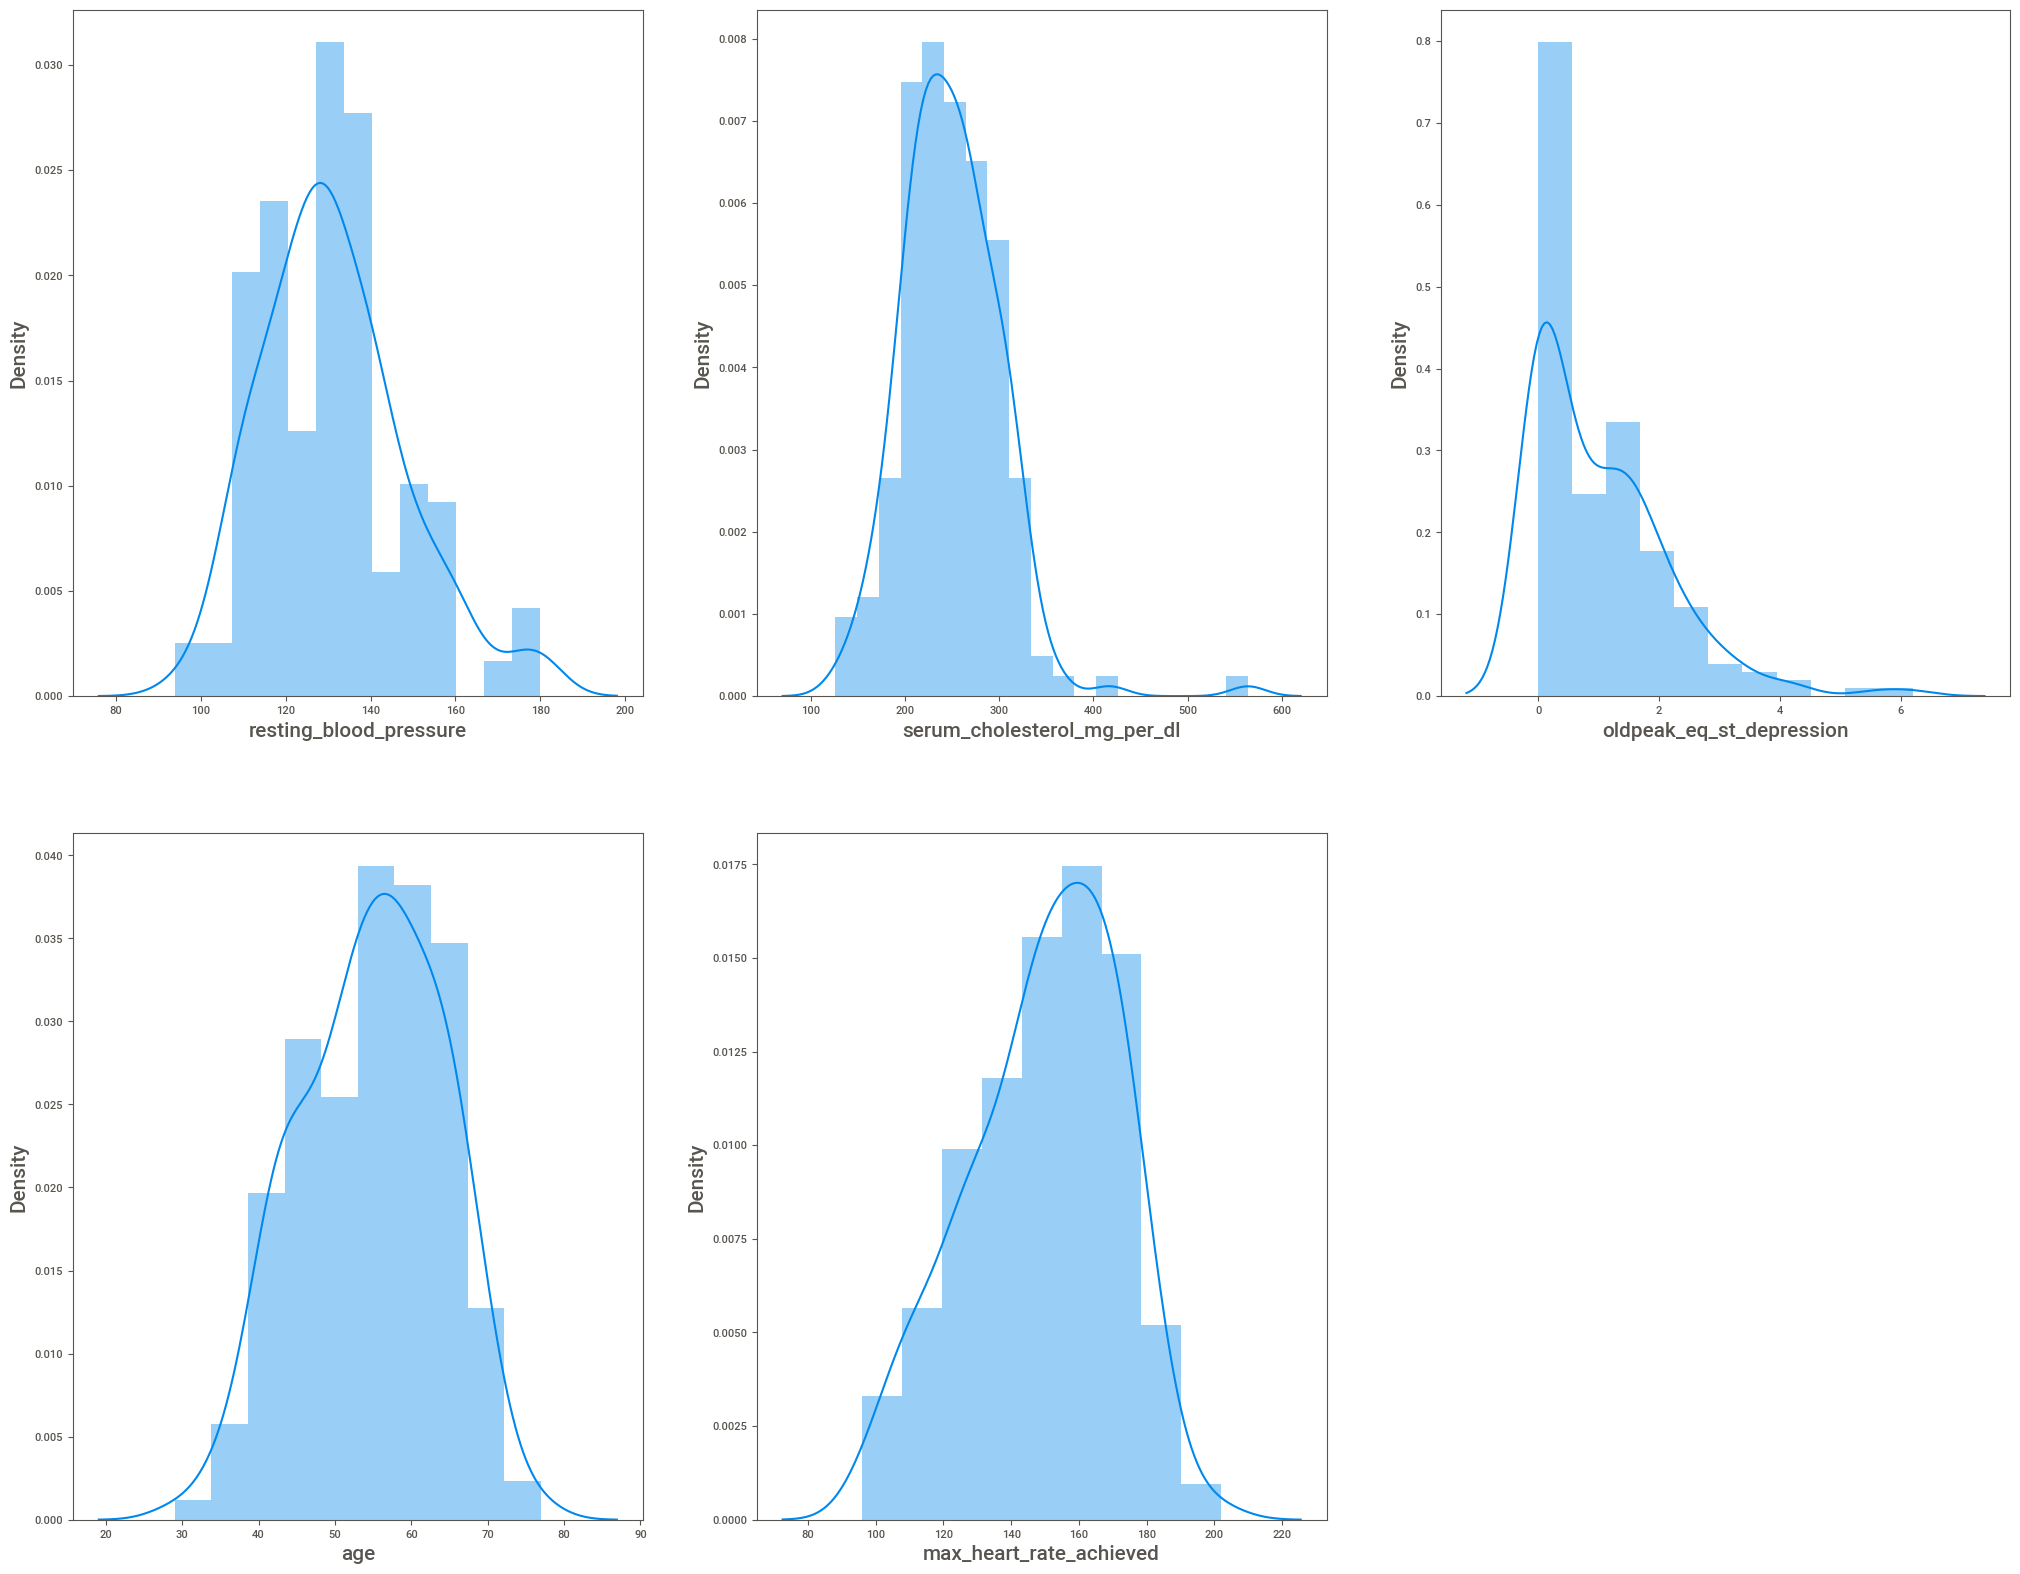

In [18]:
## Density plot of continous features

plt.figure(figsize=(25, 20))
plt_num=1
for feat in num_cont_feat:
    if plt_num<=len(num_cont_feat):
        plt.subplot(2, 3, plt_num)
        sb.distplot(data[feat])
        plt.xlabel(feat, fontsize=15)
        plt.ylabel('Density', fontsize=15)
        plt_num+=1
plt.show()

**Insight from categorical univariate analysis**

Most of the patient's have:
- 'normal' blood flow
- good quality blood flow (i.e 1)
- chest pain type 4
- 0 major vessel
- fasting blood sugar lessthan 120mg/dl
- resting electrocardiographic result eqaul to 2
- gender male
- no exercise induced chest pain
- no heart disease

**Insight from numerical univariate analysis**
- features 'resting_blood_pressure', 'age' and 'max_heart_rate_achieved' are looks like perfectly normally distributed.
- Distribution of features 'serum_cholesterol_mg_per_dl' and 'oldpeak_eq_st_depression' are somewhat normal but positively skewed. 

## Multivariate analysis

### Multivariate plot between 'heart_disease_present'(output) and categorical features

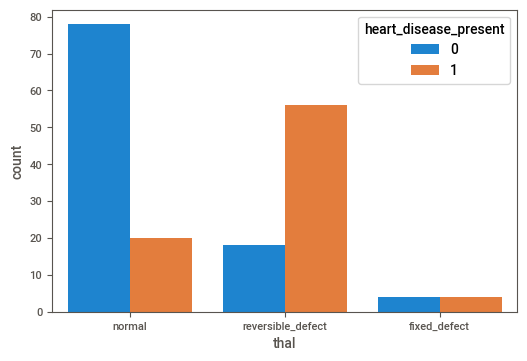

In [19]:
sb.countplot(x='thal', hue='heart_disease_present', data=data)
plt.show()

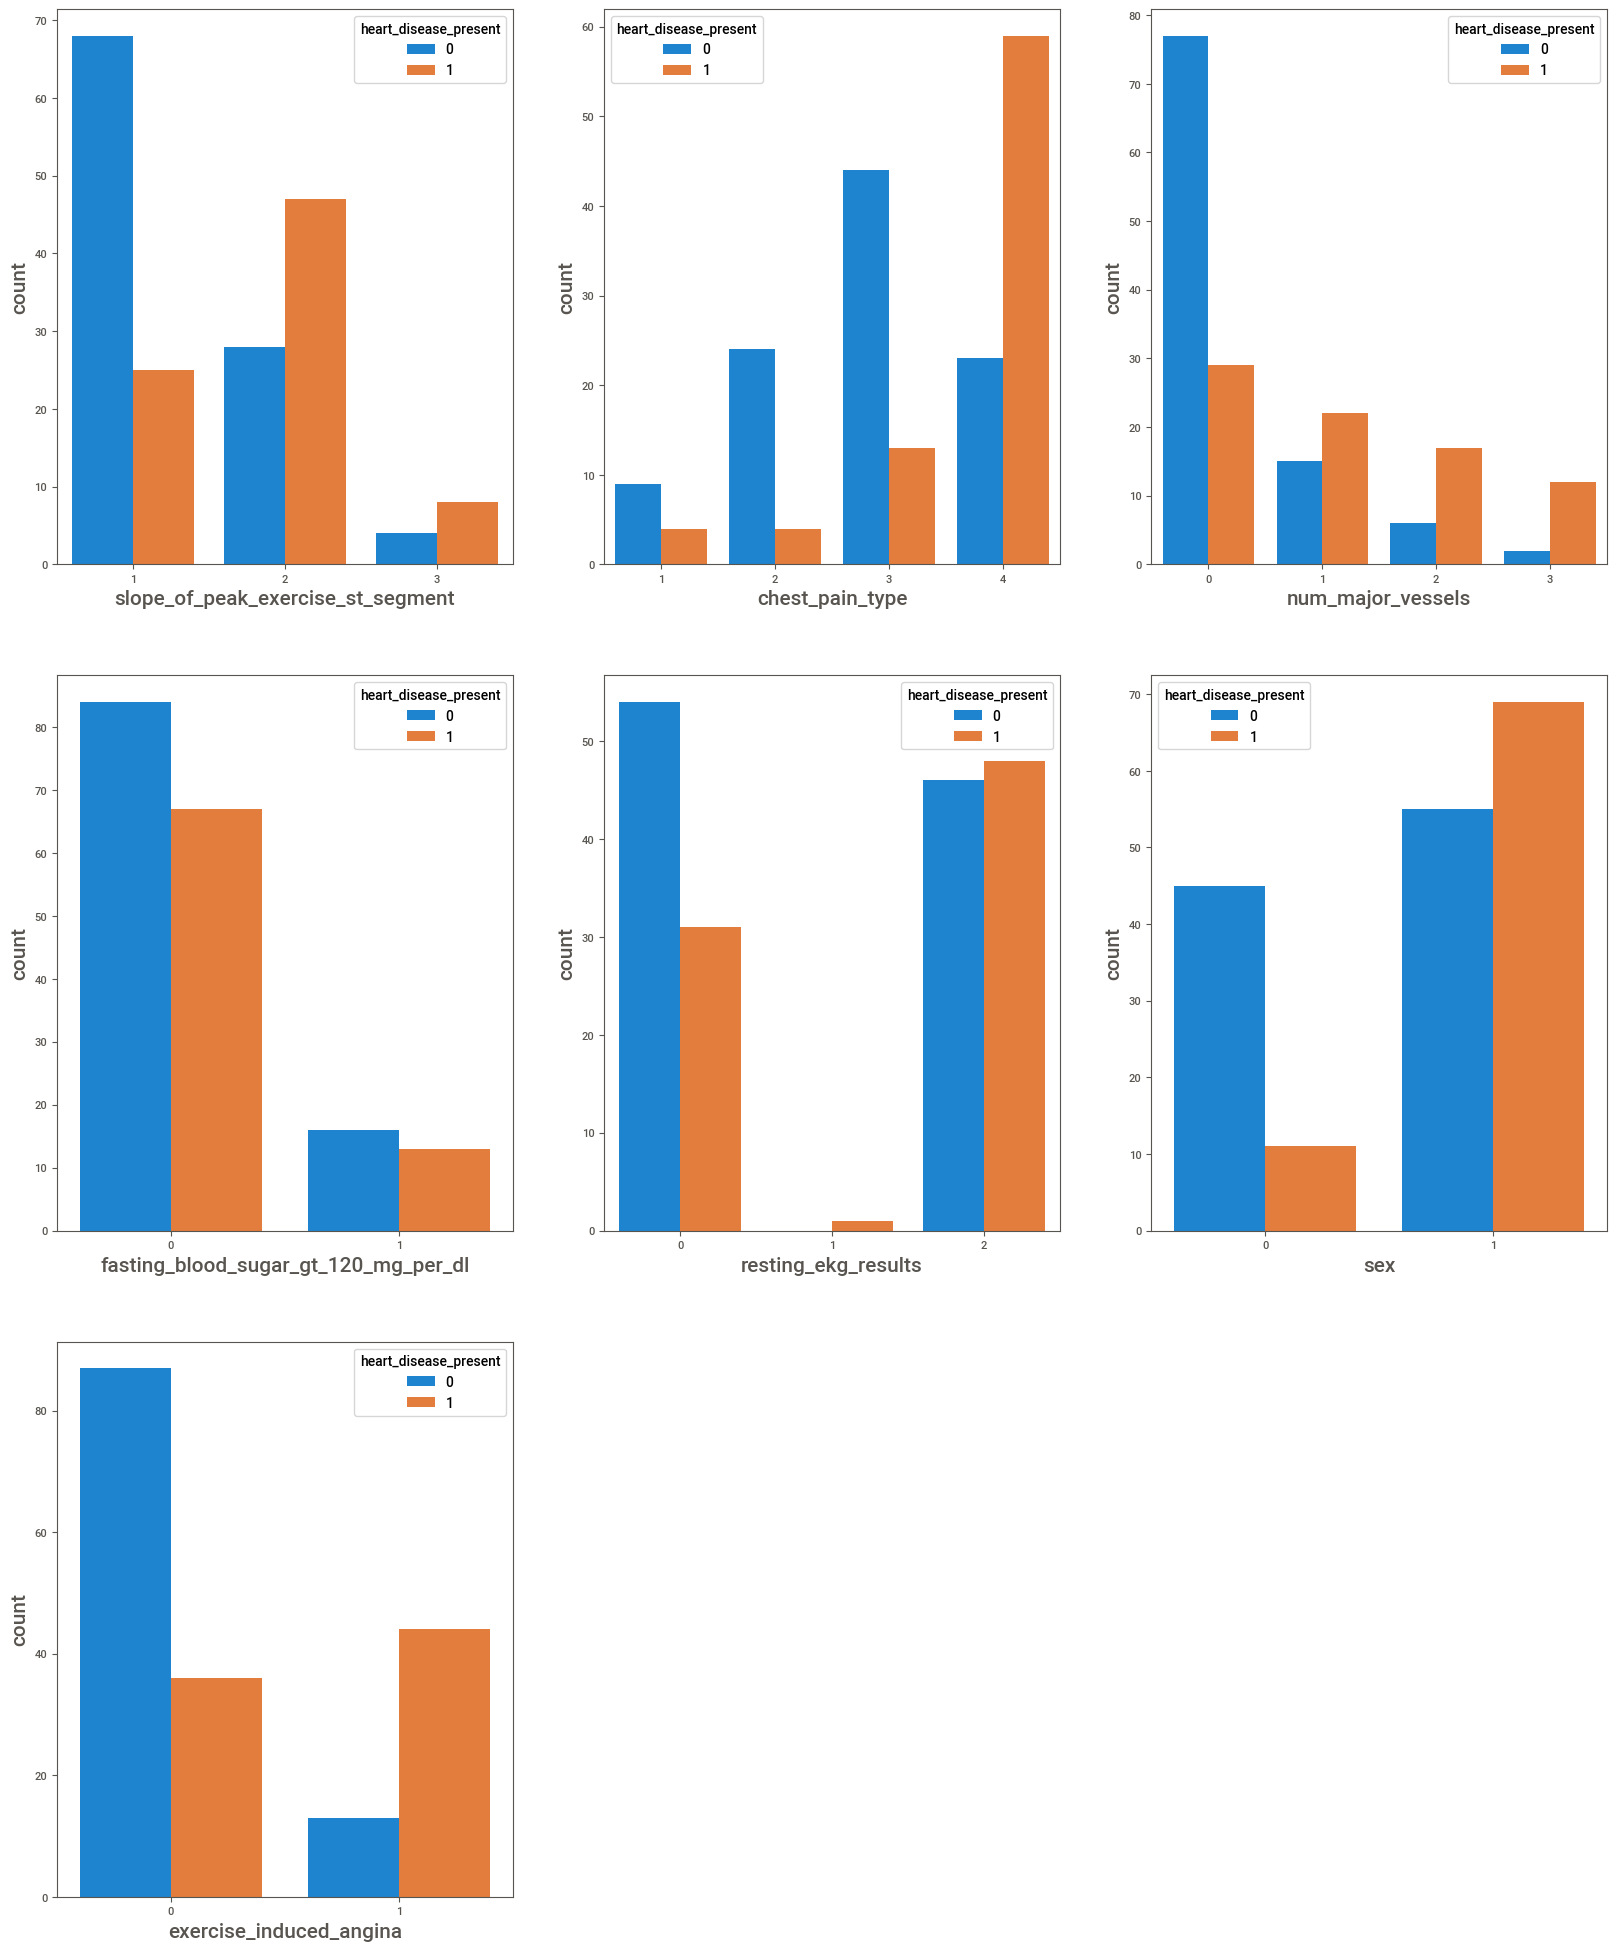

In [20]:
plt.figure(figsize=(20, 25))
plt_num=1
for feat in cat_num_feat[:-1]:
    if plt_num<=len(cat_num_feat):
        plt.subplot(3, 3, plt_num)
        sb.countplot(x=feat, hue='heart_disease_present', data=data)
        plt.xlabel(feat, fontsize=15)
        plt.ylabel('count', fontsize=15)
        plt_num+=1
plt.show()

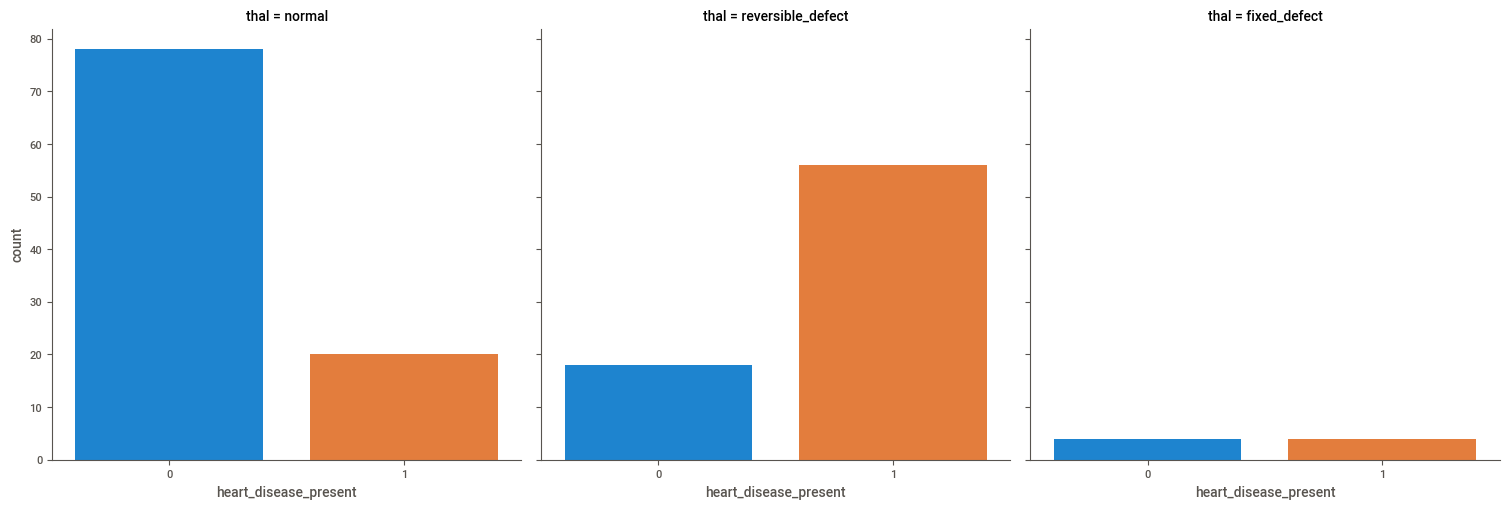

In [21]:
## multivariate categorical value based ploting for each cat features.

sb.catplot(x='heart_disease_present', col='thal', kind='count', data=data)
plt.show()

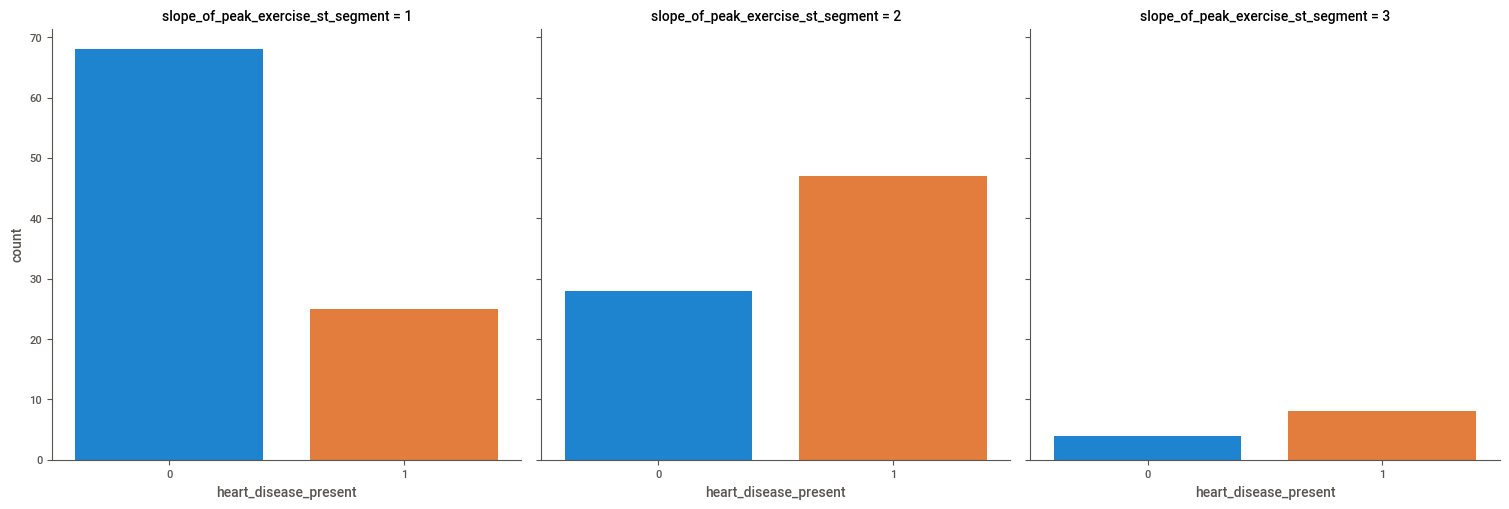

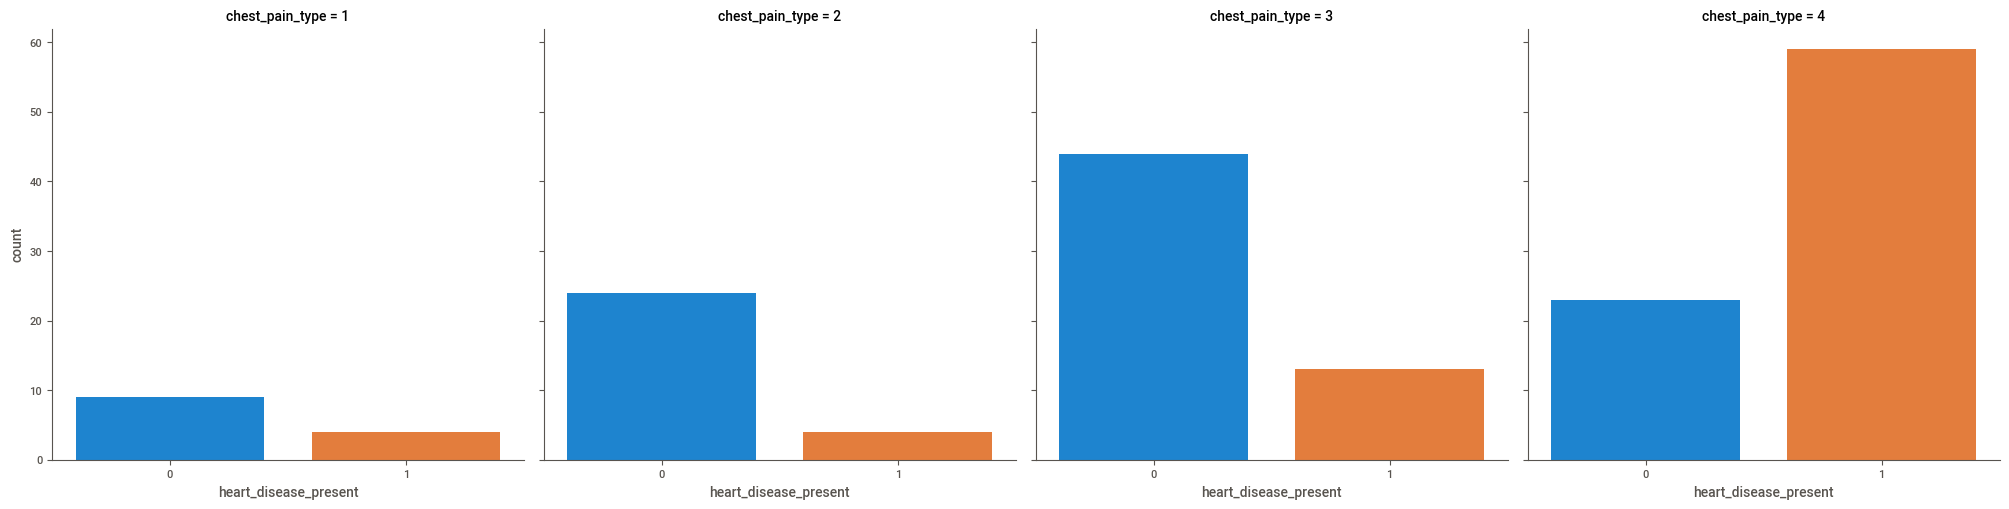

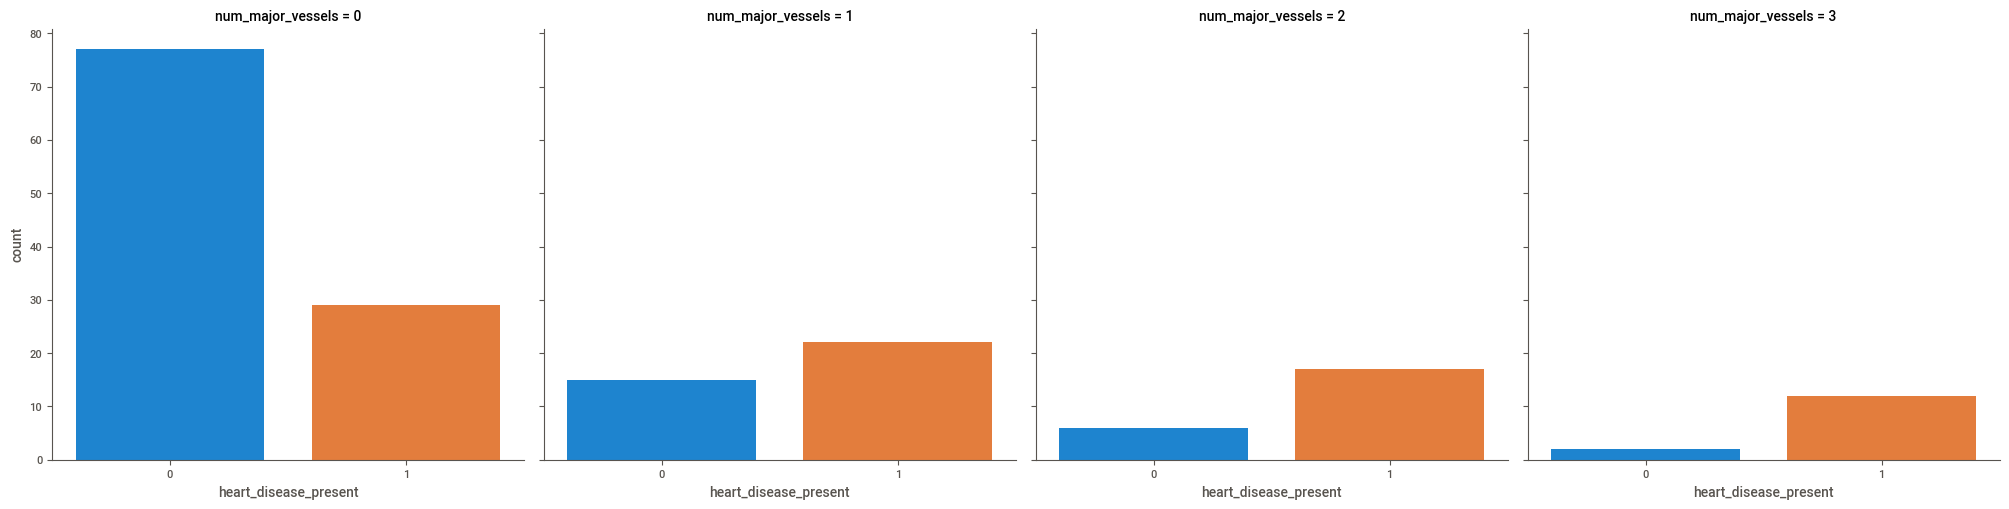

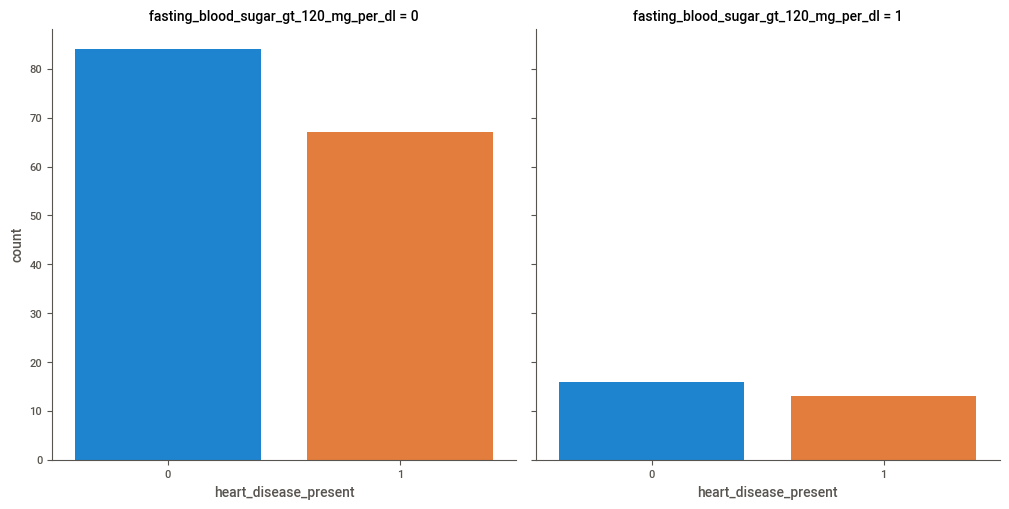

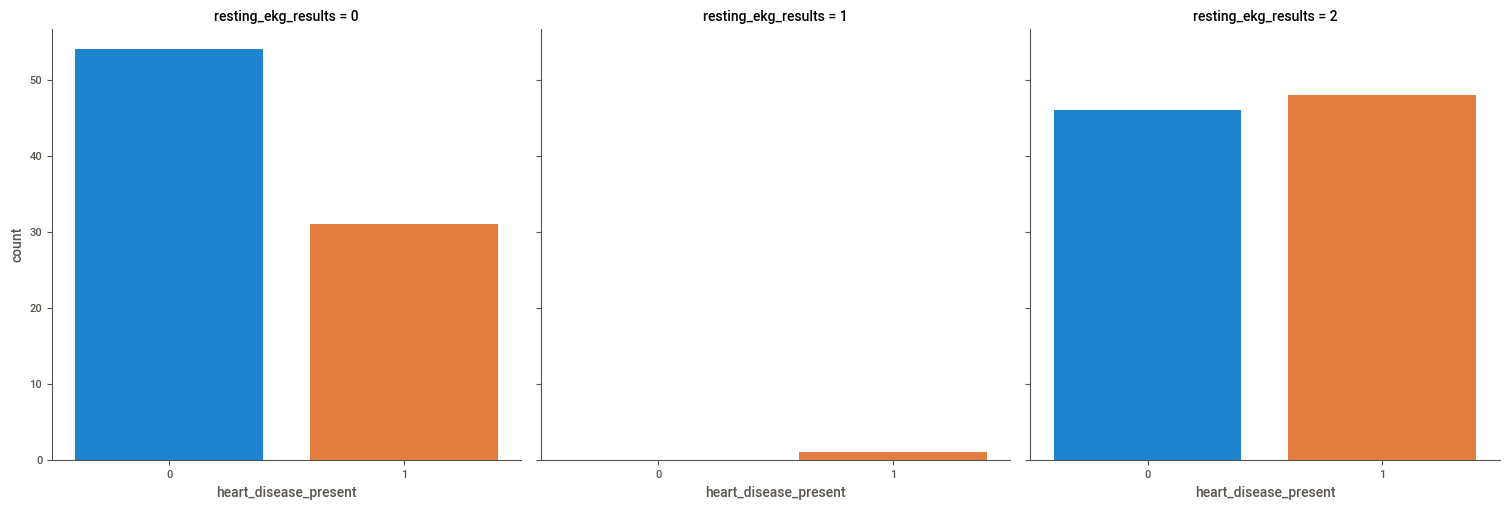

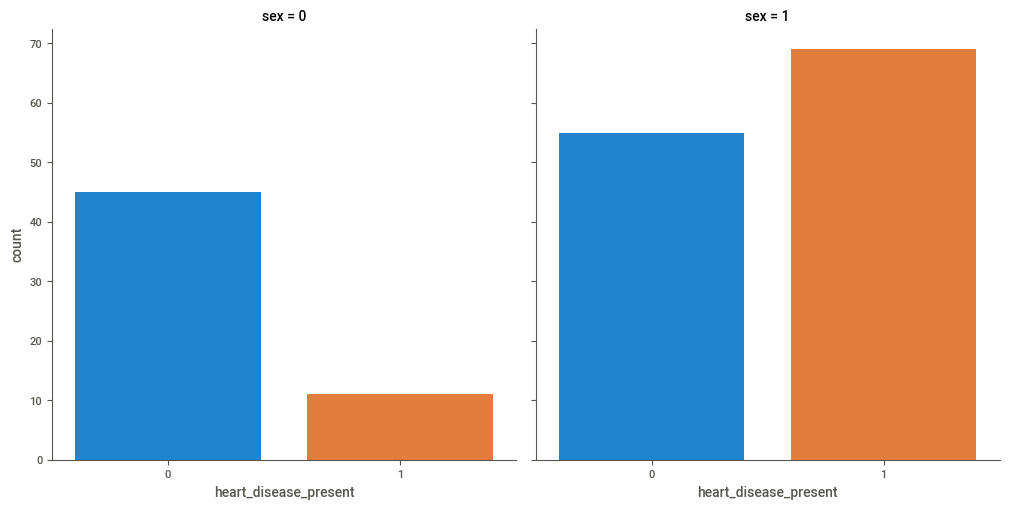

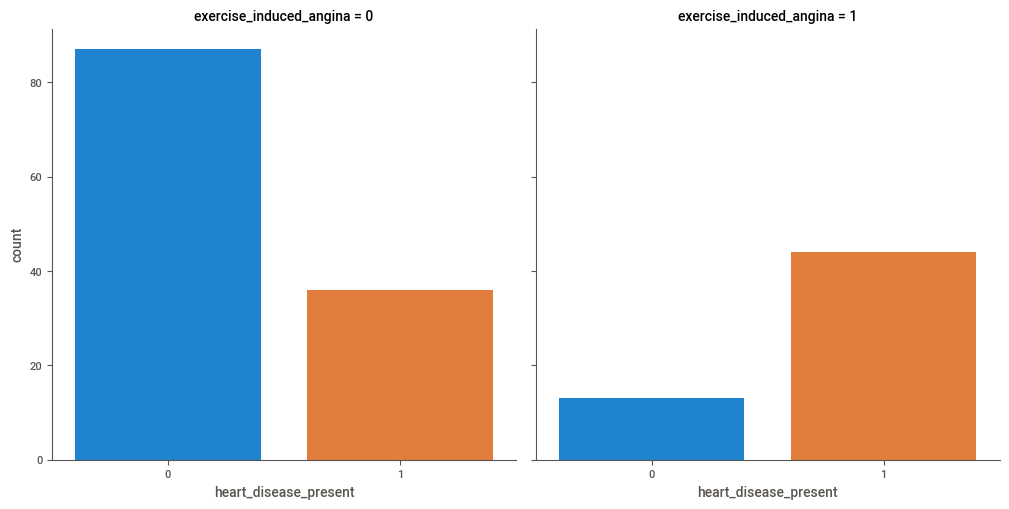

In [22]:
for feat in cat_num_feat[:-1]:
    sb.catplot(x='heart_disease_present', col=feat, kind='count', data=data)

### Multivariate plot between 'heart_disease_present'(output) and numerical features

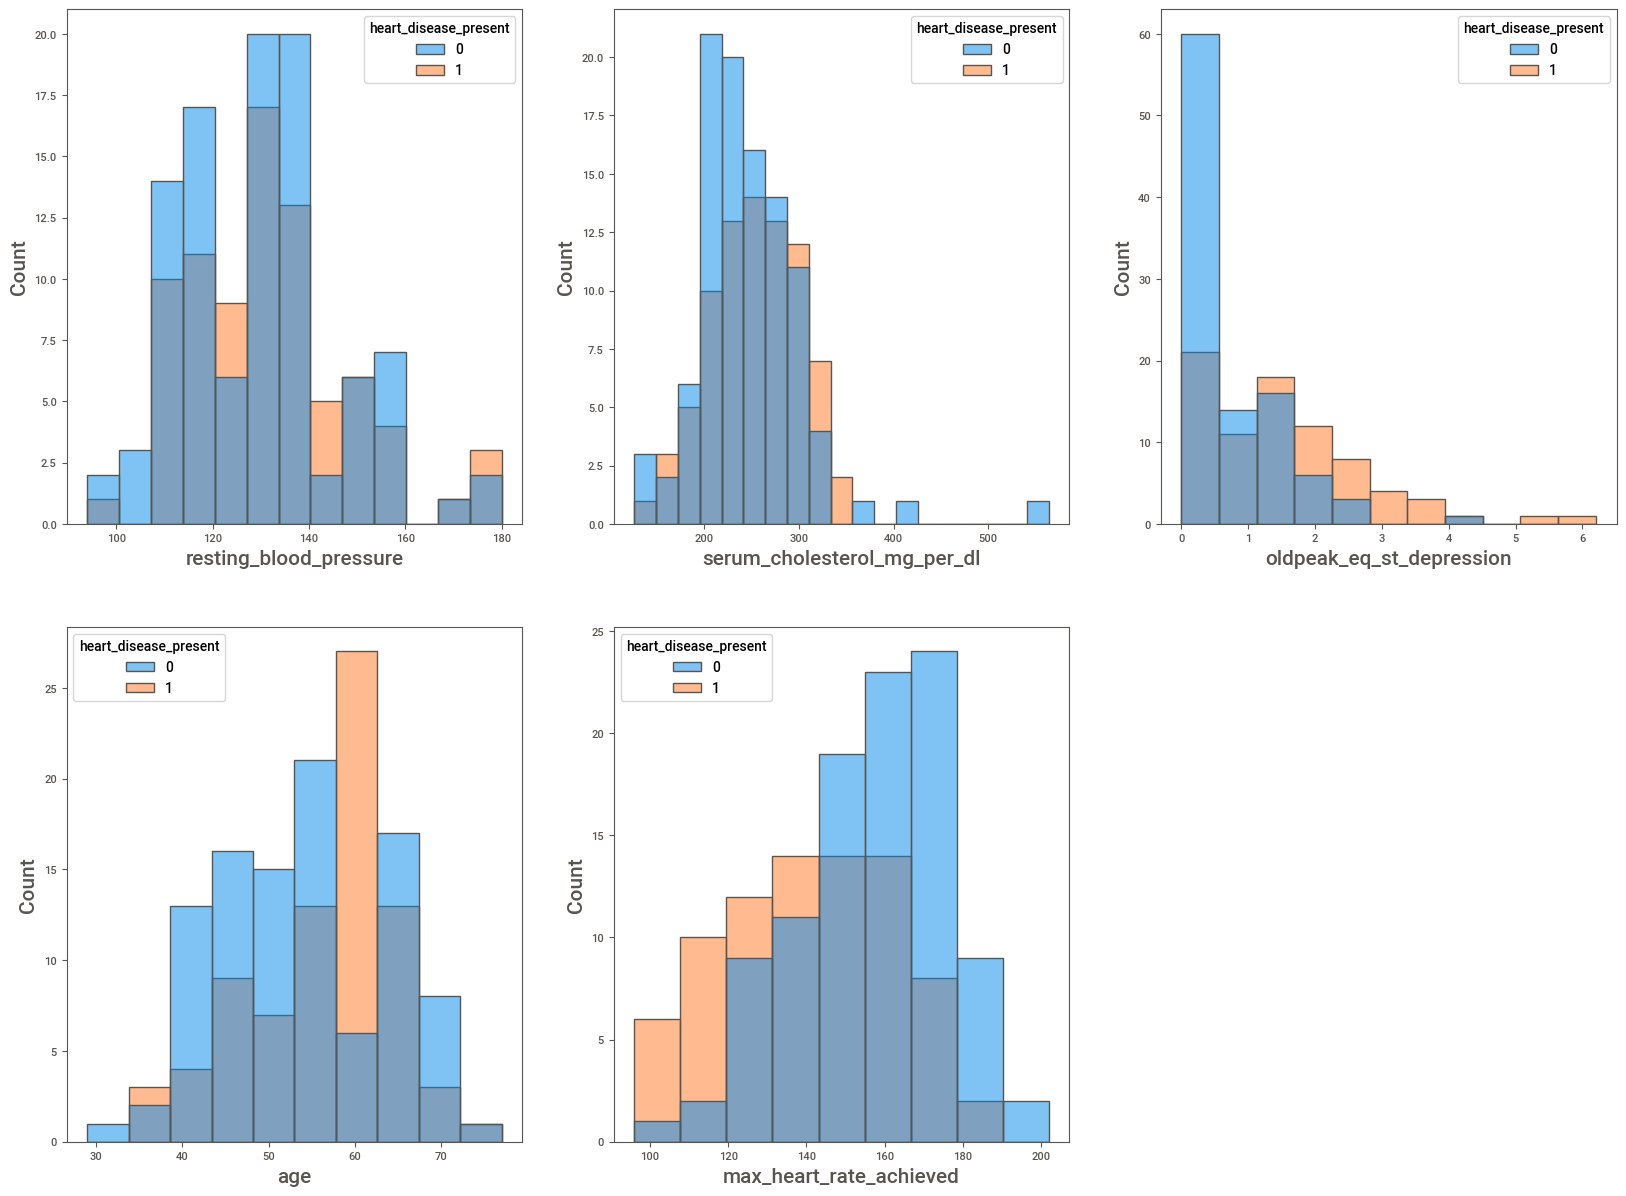

In [23]:
plt.figure(figsize=(20, 15))
plt_num=1
for feat in num_cont_feat:
    if plt_num<=len(num_cont_feat):
        plt.subplot(2, 3, plt_num)
        sb.histplot(x=feat, hue='heart_disease_present', data=data)
        plt.xlabel(feat, fontsize=15)
        plt.ylabel('Count', fontsize=15)
        plt_num+=1
plt.show()

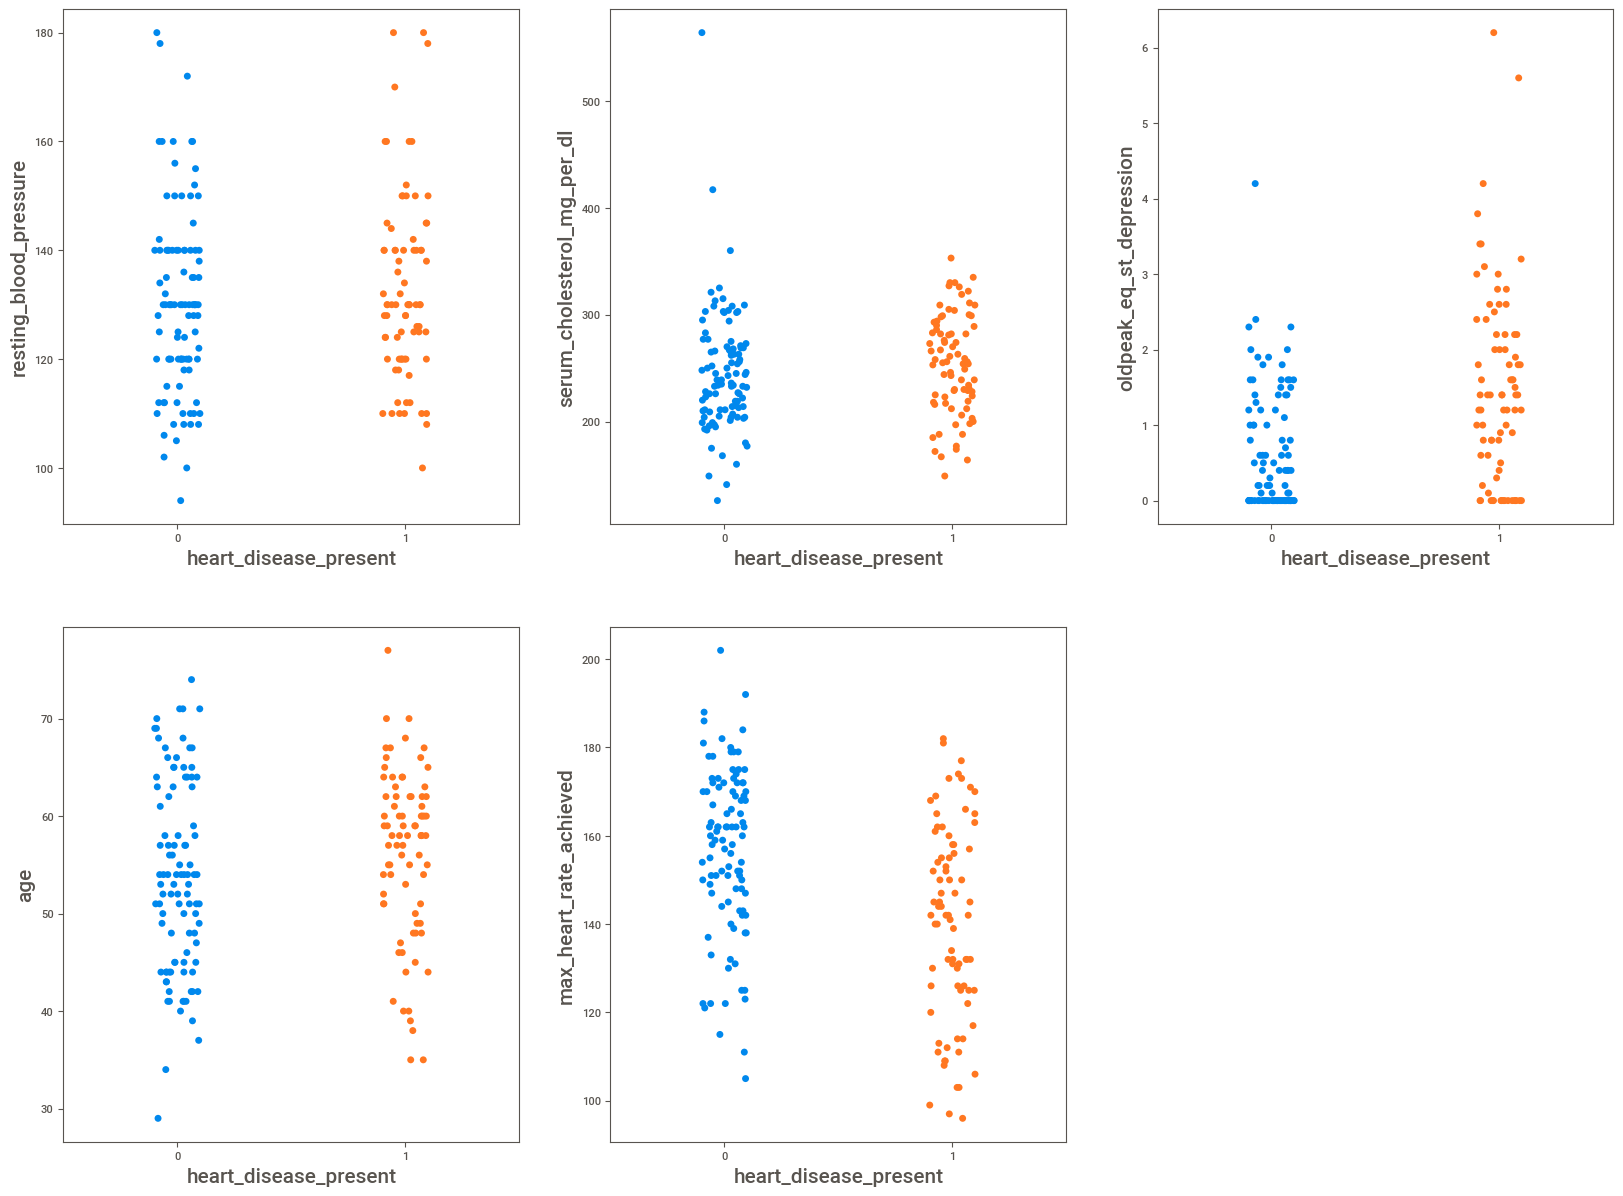

In [24]:
## stripplot

plt.figure(figsize=(20, 15))
plt_num=1
for feat in num_cont_feat:
    if plt_num<=len(num_cont_feat):
        plt.subplot(2, 3, plt_num)
        sb.stripplot(x='heart_disease_present', y=feat, data=data)
        plt.xlabel('heart_disease_present', fontsize=15)
        plt.ylabel(feat, fontsize=15)
        plt_num+=1
plt.show()

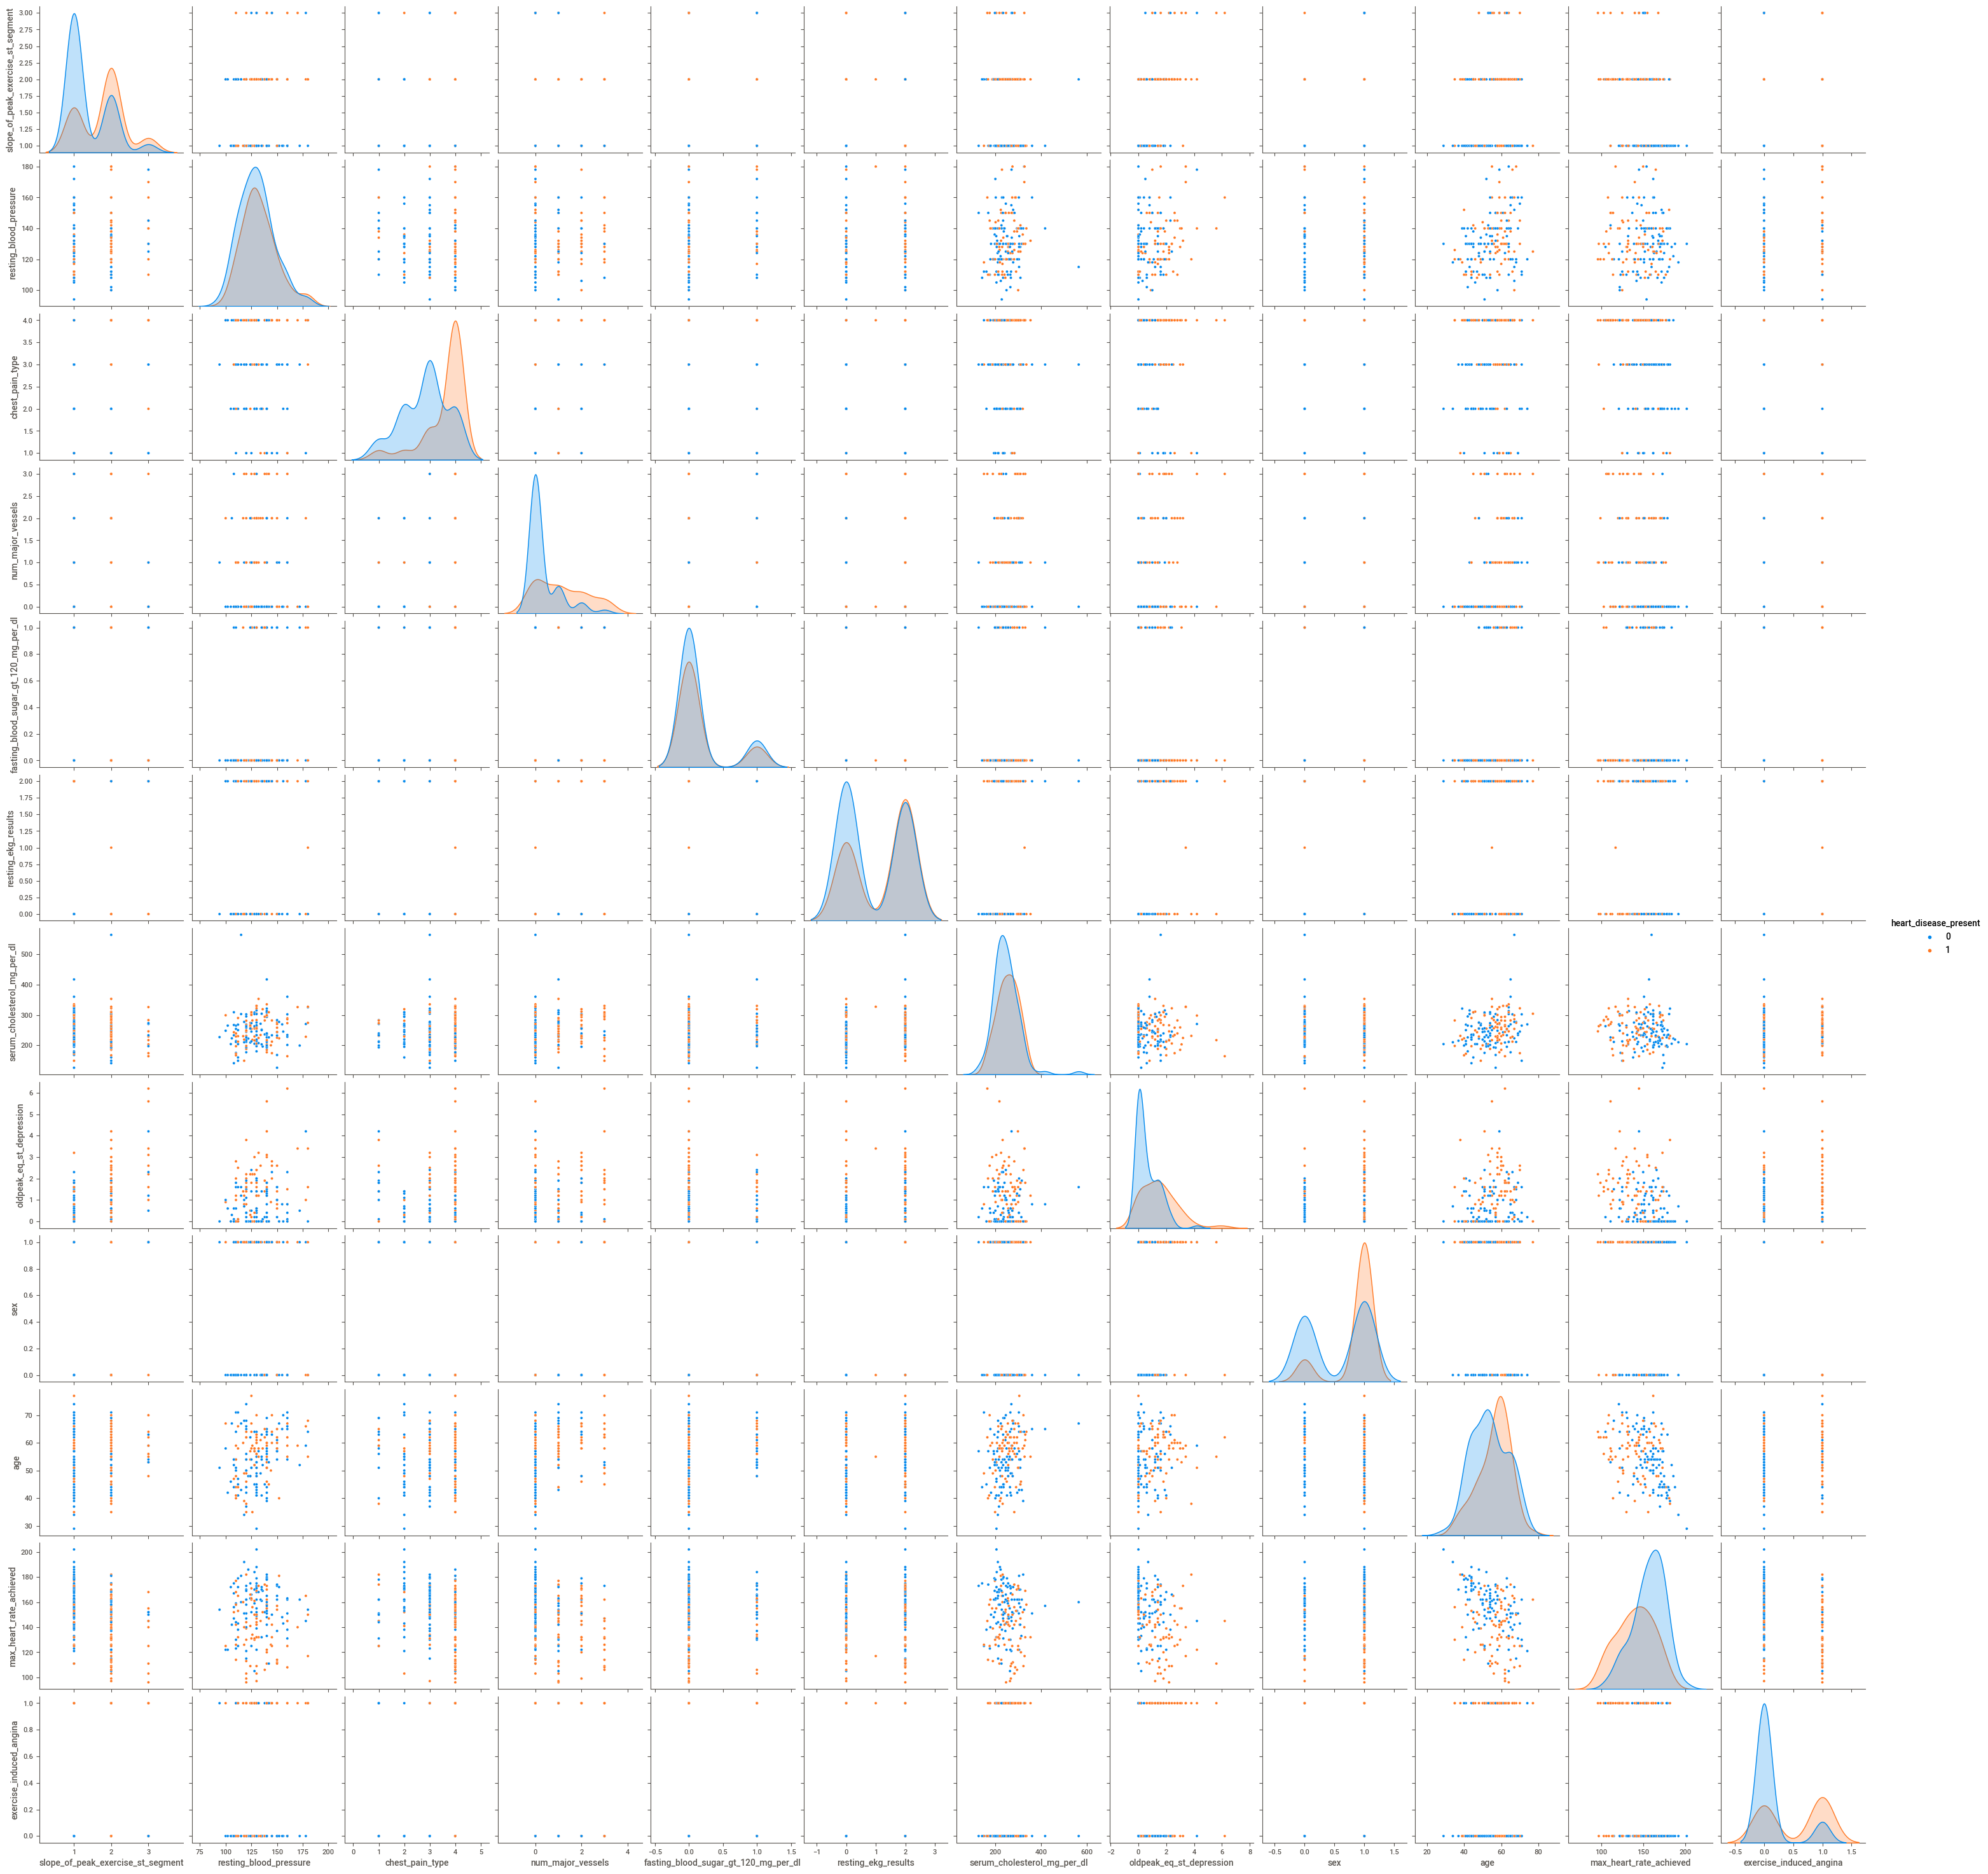

In [25]:
## pairplot between all input features

sb.pairplot(data, hue='heart_disease_present')
plt.show()

**Insight from multivariate categorical plot**

Patients who have more chance to have heart disease are those with:
- 'reversible defect' in blood flow
- quality of blood flow 2
- chest pain type 4
- detected major vessel 2(comparitve to avialable categorical datapoints)
- resting electrocardiographic result is 1 or 2
- male gender
- exercise induced chest pain

**Insight from multivariate numerical plot**
- Patients with low max_heart_rate lessthan 100 may have heart disease, like-wise patient have heart_rate greaterthan 180 may not have heart disease.
- age also shows a small variation; elders may have more chances of having heart disease than younger.
- There are three record having high cholestrol level but not having heart disease.
- Patients who have oldpeak_eq_st_depression greaterthan 2.5 are more prone to have heart disease. 

# Step 5 : Data Preprocessing

## Removing unwanted feature
We can remove unique random feature 'patient_id'.

In [26]:
data.drop(['patient_id'], axis=1, inplace=True)

## Checking presence of missing values

In [27]:
data.isnull().sum()

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

## Check for Outliers

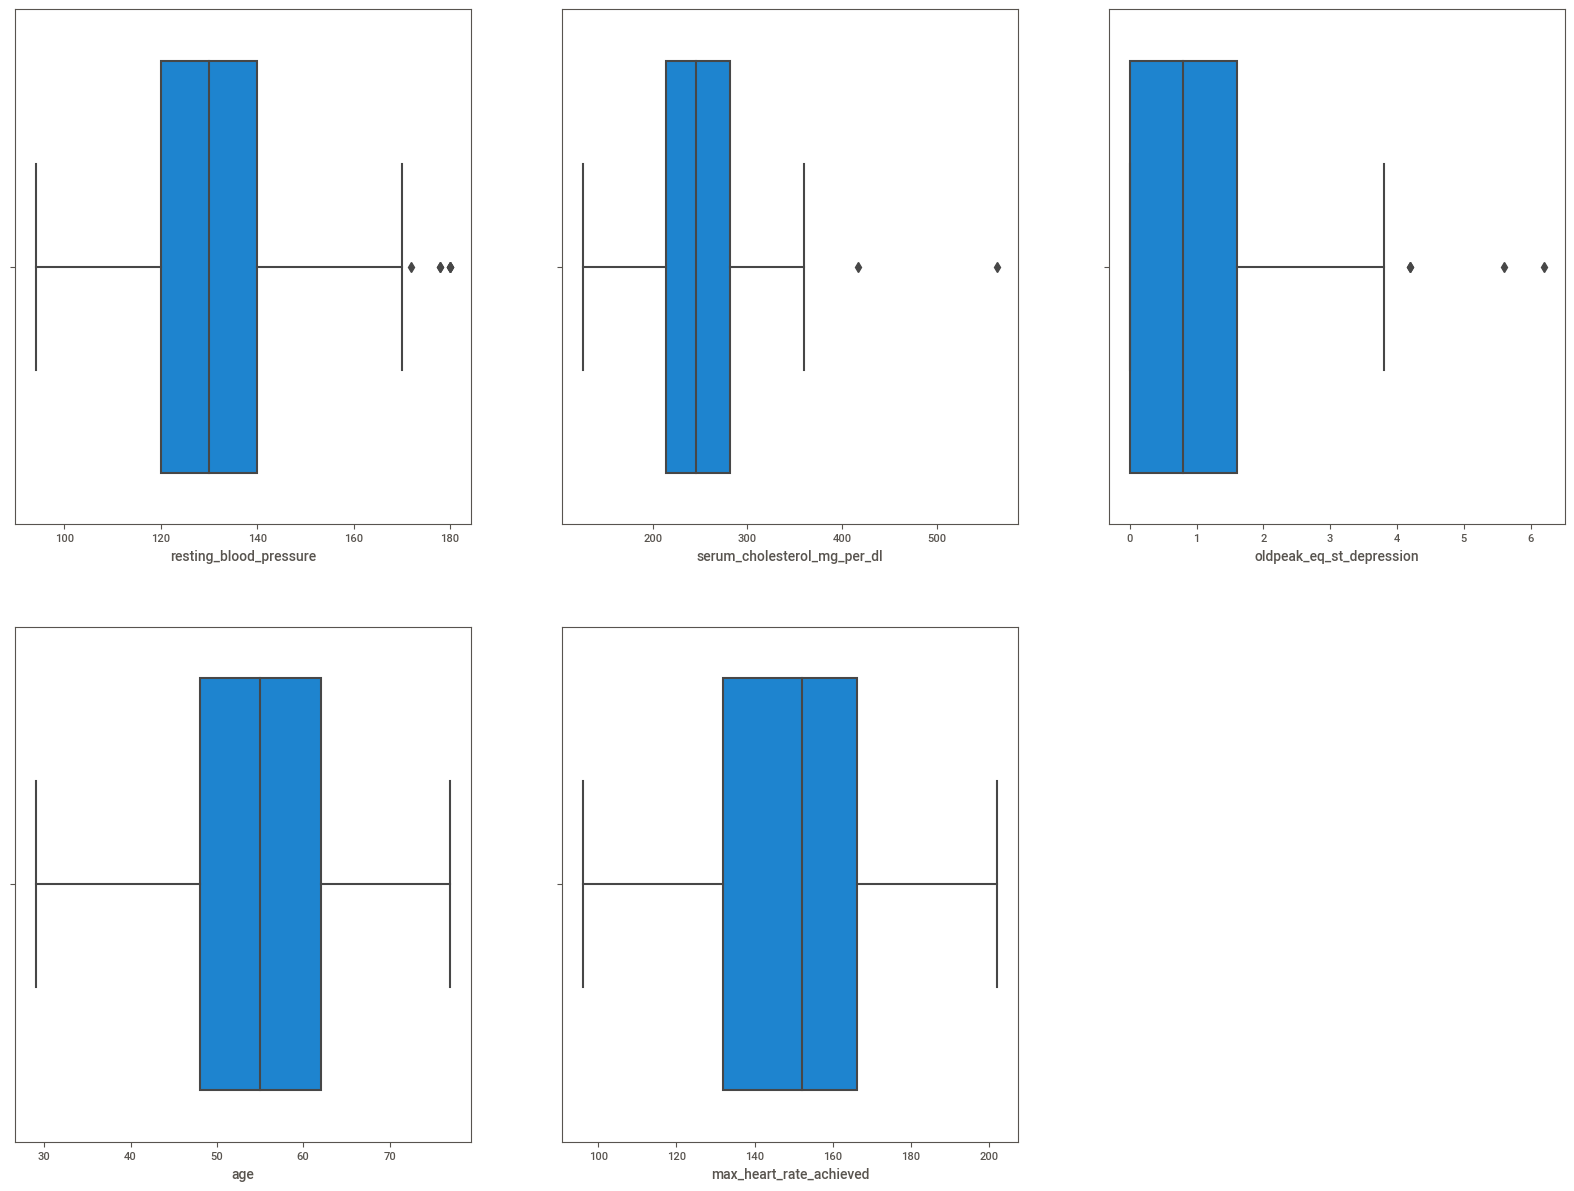

In [28]:
plt.figure(figsize=(20, 15))
plt_num=1
for col in num_cont_feat:
    if plt_num<=len(num_cont_feat):
        plt.subplot(2, 3, plt_num)
        sb.boxplot(x=col, data=data)
        plt_num+=1
plt.show()

### Lets ckeck normality

In [29]:
from scipy import stats

for feat in num_cont_feat:
    print(feat, 'has skewness: {}'.format(stats.skew(data[feat])))

resting_blood_pressure has skewness: 0.6515915088698496
serum_cholesterol_mg_per_dl has skewness: 1.2632907841049
oldpeak_eq_st_depression has skewness: 1.4948214849547024
age has skewness: -0.19750200100335744
max_heart_rate_achieved has skewness: -0.3904163075399945


In [30]:
for feat in num_cont_feat:
    print(feat, 'has kurtosis: {}'.format(stats.kurtosis(data[feat])))

resting_blood_pressure has kurtosis: 0.4269155263246307
serum_cholesterol_mg_per_dl has kurtosis: 6.155855832741439
oldpeak_eq_st_depression has kurtosis: 3.1202655698924504
age has kurtosis: -0.5848578214439546
max_heart_rate_achieved has kurtosis: -0.5028077850377723


Features 'resting_blood_pressure', 'serum_cholesterol_mg_per_dl' and 'oldpeak_eq_st_depression' are not perfectly normal, they have outliers. Lets deal with it.

#### 'resting_blood_pressure'
We can see 'resting_blood_pressure' has skewness out of 0.5 to -0.5 range, so it is not normally distributed. Therefore we can use IQR methode and median value to impute outliers. 

In [31]:
data.resting_blood_pressure.describe()

count    180.000000
mean     131.311111
std       17.010443
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      180.000000
Name: resting_blood_pressure, dtype: float64

In [32]:
iqr = stats.iqr(data.resting_blood_pressure, interpolation='midpoint')
print(iqr)
q1 = data.resting_blood_pressure.quantile(0.25)
q3 = data.resting_blood_pressure.quantile(0.75)
print(q1, ' ', q3)

20.0
120.0   140.0


In [33]:
lower_limit = q1-1.5*iqr
upper_limit = q3+1.5*iqr
print(lower_limit, ' ', upper_limit)

90.0   170.0


In [34]:
data.loc[data.resting_blood_pressure>upper_limit]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
33,1,normal,180,4,0,0,0,325,0.0,0,64,154,1,0
72,1,reversible_defect,172,3,0,1,0,199,0.5,1,52,162,0,0
75,2,reversible_defect,178,4,2,1,0,228,1.0,0,66,165,1,1
113,2,reversible_defect,180,3,0,1,2,274,1.6,1,68,150,1,1
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1


In [35]:
data.loc[data.resting_blood_pressure>upper_limit, 'resting_blood_pressure'] = data.resting_blood_pressure.median()

In [36]:
data.loc[data.resting_blood_pressure>upper_limit]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


#### 'serum_cholesterol_mg_per_dl'
It is not normally distributed because skewness and kurtosis are greaterthan 1, so we use IQR and median method to impute outliers.

In [37]:
data.serum_cholesterol_mg_per_dl.describe()

count    180.000000
mean     249.211111
std       52.717969
min      126.000000
25%      213.750000
50%      245.500000
75%      281.250000
max      564.000000
Name: serum_cholesterol_mg_per_dl, dtype: float64

In [39]:
iqr2 = stats.iqr(data.serum_cholesterol_mg_per_dl, interpolation='midpoint')
print(iqr2)
q1_2 = data.serum_cholesterol_mg_per_dl.quantile(0.25)
q3_2 = data.serum_cholesterol_mg_per_dl.quantile(0.75)
print(q1_2, ' ', q3_2)

68.0
213.75   281.25


In [40]:
lower_limit_2 = q1_2-1.5*iqr2 
upper_limit_2 = q3_2+1.5*iqr2 
print(lower_limit_2, ' ', upper_limit_2)

111.75   383.25


In [41]:
data.loc[data.serum_cholesterol_mg_per_dl>upper_limit_2]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
43,1,normal,140,3,1,1,2,417,0.8,0,65,157,0,0
60,2,reversible_defect,115,3,0,0,2,564,1.6,0,67,160,0,0


In [42]:
data.loc[data.serum_cholesterol_mg_per_dl>upper_limit_2, 'serum_cholesterol_mg_per_dl'] = data.serum_cholesterol_mg_per_dl.median()
data.loc[data.serum_cholesterol_mg_per_dl>upper_limit_2]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


#### 'oldpeak_eq_st_depression'
It is also not normally distributed because skewness and kurtosis are greaterthan 1, so we use IQR and median method to impute outliers

In [43]:
data.oldpeak_eq_st_depression.describe()

count    180.000000
mean       1.010000
std        1.121357
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak_eq_st_depression, dtype: float64

In [44]:
iqr3 = stats.iqr(data.oldpeak_eq_st_depression, interpolation='midpoint')
print(iqr3)
q1_3 = data.oldpeak_eq_st_depression.quantile(0.25)
q3_3 = data.oldpeak_eq_st_depression.quantile(0.75)

1.6


In [45]:
lower_limit_3 = q1_3-1.5*iqr3
upper_limit_3 = q3_3+1.5*iqr3
print(lower_limit_3, ' ', upper_limit_3)

-2.4000000000000004   4.0


In [46]:
data.loc[data.oldpeak_eq_st_depression>upper_limit_3]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
4,3,reversible_defect,130,1,0,0,2,270.0,4.2,1,59,145,0,0
112,2,reversible_defect,140,4,3,0,0,298.0,4.2,1,51,122,1,1
140,3,reversible_defect,140,4,0,0,0,217.0,5.6,1,55,111,1,1
162,3,reversible_defect,160,4,3,0,2,164.0,6.2,0,62,145,0,1


In [47]:
data.loc[data.oldpeak_eq_st_depression>upper_limit_3, 'oldpeak_eq_st_depression'] = data.oldpeak_eq_st_depression.median()
data.loc[data.oldpeak_eq_st_depression>upper_limit_3]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


## Convert categorical to numerical

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    object 
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    float64
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi

In [49]:
data.thal.value_counts()

normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

In [50]:
## manual label encoding of 'thal' feature.

data['thal'].replace({'fixed_defect':0, 'normal':1, 'reversible_defect':2}, inplace=True)

In [51]:
data.thal.value_counts()

1    98
2    74
0     8
Name: thal, dtype: int64

In [52]:
data.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,1,128,2,0,0,2,308.0,0.0,1,45,170,0,0
1,2,1,110,3,0,0,0,214.0,1.6,0,54,158,0,0
2,1,1,125,4,3,0,2,304.0,0.0,1,77,162,1,1
3,1,2,152,4,0,0,0,223.0,0.0,1,40,181,0,1
4,3,2,130,1,0,0,2,270.0,0.8,1,59,145,0,0


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    int64  
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    float64
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi

## Splitting dataset into train and test independent and dependent sets
Inorder to avoid data leakage issue, we first do splitting of dataset and then apply SMOTE and scaling.

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE 
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [54]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [57]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, stratify=y)

In [59]:
print(y_train.value_counts(normalize=True).mul(100).round(2))
print(y_test.value_counts(normalize=True).mul(100).round(2))

0    55.56
1    44.44
Name: heart_disease_present, dtype: float64
0    55.56
1    44.44
Name: heart_disease_present, dtype: float64


#### Balancing

In [58]:
sm = SMOTE()
X_train_sm, y_train_sm = sm.fit_resample(X_train_raw, y_train)
print('X_train size:', Counter(y_train))
print('X_train_sm size:', Counter(y_train_sm))

X_train size: Counter({0: 80, 1: 64})
X_train_sm size: Counter({0: 80, 1: 80})


In [60]:
y_train_sm.value_counts(normalize=True).mul(100).round(2)

0    50.0
1    50.0
Name: heart_disease_present, dtype: float64

In [61]:
train_data = pd.concat([X_train_sm, y_train_sm], axis=1)
test_data = pd.concat([X_test_raw, y_test], axis=1)

#### Scaling

In [62]:
scaler = StandardScaler()
train_data.iloc[:, :-1] = scaler.fit_transform(train_data.iloc[:, :-1])
test_data.iloc[:, :-1] = scaler.transform(test_data.iloc[:, :-1])

In [63]:
train_data

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,-0.833718,-0.632904,0.687389,0.940875,-0.739271,-0.409736,-1.071325,-0.433145,-0.974216,0.644926,-1.381386,1.268819,-0.67420,0
1,0.773450,1.143668,-1.051735,-0.104542,-0.739271,-0.409736,0.945286,-0.000190,0.738991,-1.550566,1.351326,0.444873,-0.67420,0
2,-0.833718,-0.632904,0.409129,-1.149958,1.411336,2.440599,0.945286,1.631719,-0.974216,-1.550566,0.367550,0.078675,-0.67420,1
3,-0.833718,1.143668,-1.538690,-1.149958,-0.739271,-0.409736,-1.071325,1.409691,-0.974216,0.644926,-0.069684,0.261774,-0.67420,0
4,-0.833718,1.143668,-0.008261,0.940875,2.486640,2.440599,0.945286,1.875950,0.953142,0.644926,0.914092,-0.836820,1.48324,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.773450,-0.632904,0.687389,-0.104542,-0.739271,-0.409736,0.945286,-1.125900,2.296338,0.644926,0.148933,0.216000,-0.67420,1
156,-0.833718,-0.632904,-0.008261,-0.104542,0.336032,-0.409736,-1.071325,0.145295,0.588913,0.644926,0.586167,-0.287523,-0.67420,1
157,-0.833718,1.143668,-0.356086,0.940875,1.411336,2.440599,-1.071325,-0.372809,0.250192,-1.550566,0.914092,0.582198,1.48324,1
158,-0.833718,-0.632904,-1.190865,0.940875,-0.739271,-0.409736,0.945286,0.970205,-0.974216,0.644926,-1.272078,0.124450,-0.67420,1


# Step 6 : Feature Selection
Inorder to avoid data leakage issue, we only use train set to select features by seeing feature importance. Then we select those features from train and test sets.

In [64]:
# Pearson Correlation
train_data.corr()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
slope_of_peak_exercise_st_segment,1.000000,0.132613,0.107012,0.091359,0.053331,0.030599,0.150024,-0.092499,0.464887,0.096621,0.225182,-0.413057,0.174723,0.251120
thal,0.132613,1.000000,-0.019904,0.235640,0.129098,-0.069430,-0.062277,0.035250,0.203983,0.213153,0.009300,-0.159611,0.339866,0.388625
resting_blood_pressure,0.107012,-0.019904,1.000000,-0.042680,0.096280,0.151524,0.138011,0.143448,0.135237,0.006282,0.296410,-0.012764,0.044145,0.063043
chest_pain_type,0.091359,0.235640,-0.042680,1.000000,0.259958,-0.098705,0.098822,0.082199,0.008178,0.067422,0.125557,-0.290562,0.366506,0.392031
num_major_vessels,0.053331,0.129098,0.096280,0.259958,1.000000,0.156841,0.163482,0.159253,0.168025,0.078387,0.431132,-0.264240,0.226553,0.416680
fasting_blood_sugar_gt_120_mg_per_dl,0.030599,-0.069430,0.151524,-0.098705,0.156841,1.000000,0.028066,-0.045676,-0.018748,0.029578,0.187597,0.121937,0.031228,-0.017815
resting_ekg_results,0.150024,-0.062277,0.138011,0.098822,0.163482,0.028066,1.000000,0.160402,0.073034,0.082150,0.096870,-0.128891,0.025492,0.138642
serum_cholesterol_mg_per_dl,-0.092499,0.035250,0.143448,0.082199,0.159253,-0.045676,0.160402,1.000000,-0.070383,-0.063540,0.193035,-0.115679,0.141362,0.083450
oldpeak_eq_st_depression,0.464887,0.203983,0.135237,0.008178,0.168025,-0.018748,0.073034,-0.070383,1.000000,0.181253,0.222838,-0.297192,0.234561,0.401362
sex,0.096621,0.213153,0.006282,0.067422,0.078387,0.029578,0.082150,-0.063540,0.181253,1.000000,-0.111050,-0.097848,0.197977,0.370489


<AxesSubplot:>

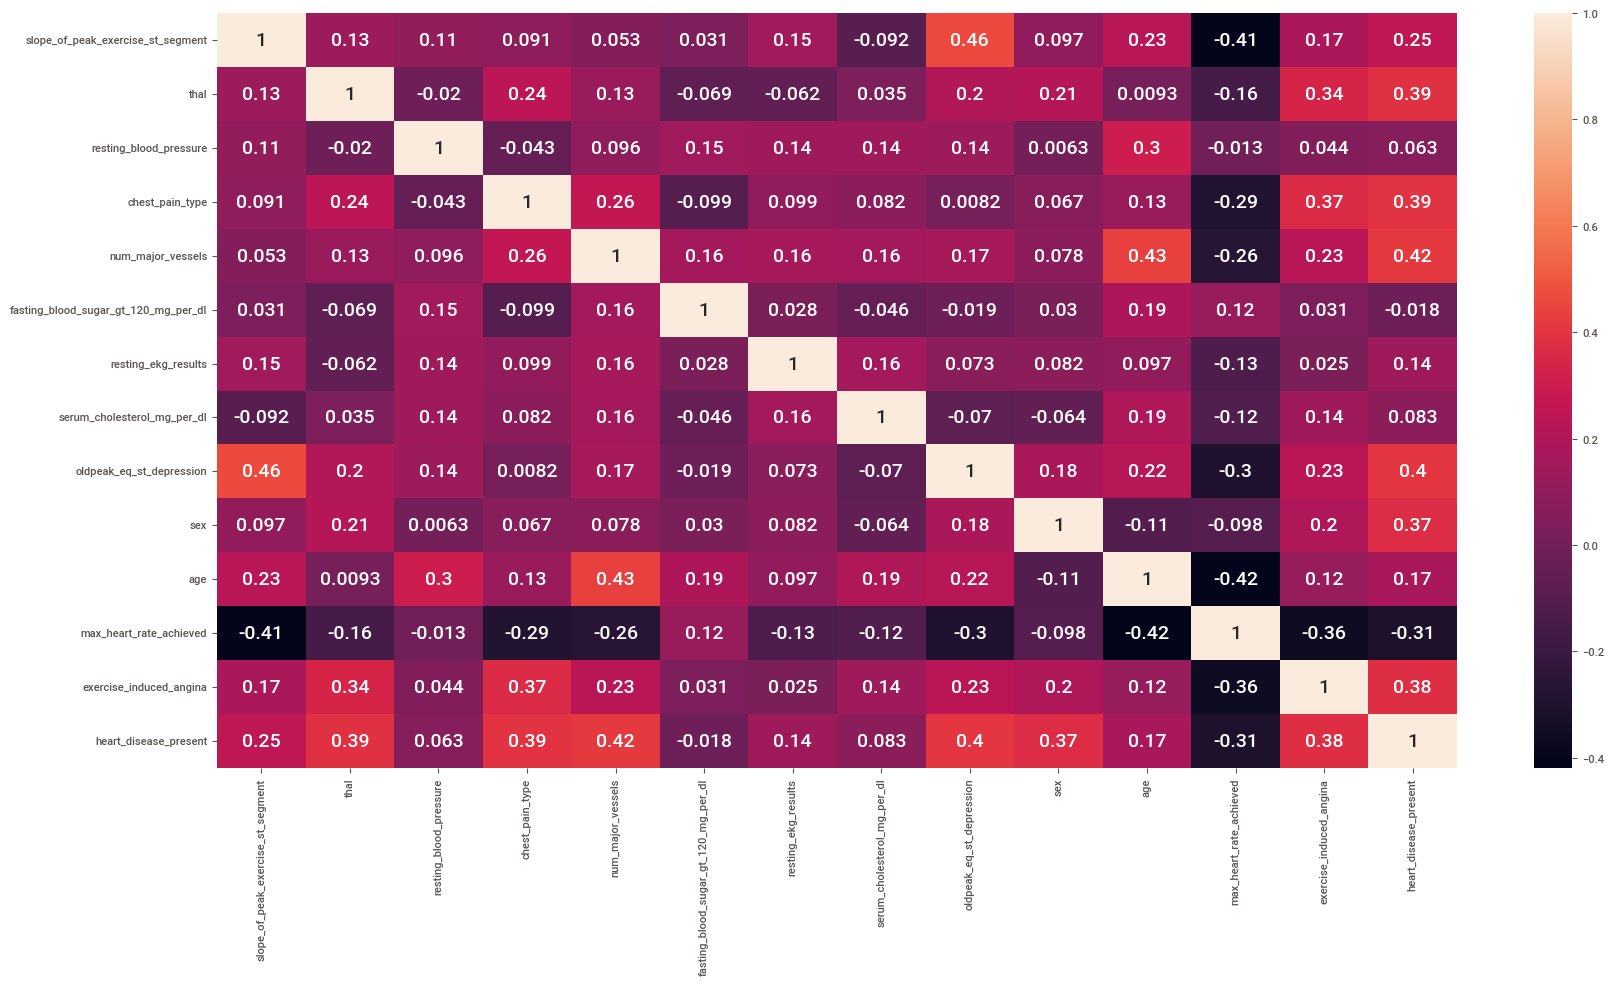

In [65]:
## heatmap plot

plt.figure(figsize=(20, 10))
sb.heatmap(train_data.corr(), annot=True, annot_kws={'size':14})

As we can see there is no much multicollinearty exist in data.

In [66]:
## Checking using ExtraTree Classifier

from sklearn.ensemble import ExtraTreesClassifier
check_feat = ExtraTreesClassifier()
check_feat.fit(train_data.iloc[:,:-1], train_data.iloc[:, -1])

ExtraTreesClassifier()

[0.0480695  0.10924947 0.07331561 0.11301589 0.10433287 0.0241665
 0.04449799 0.06958996 0.1059578  0.09421487 0.06960386 0.07391011
 0.07007556]


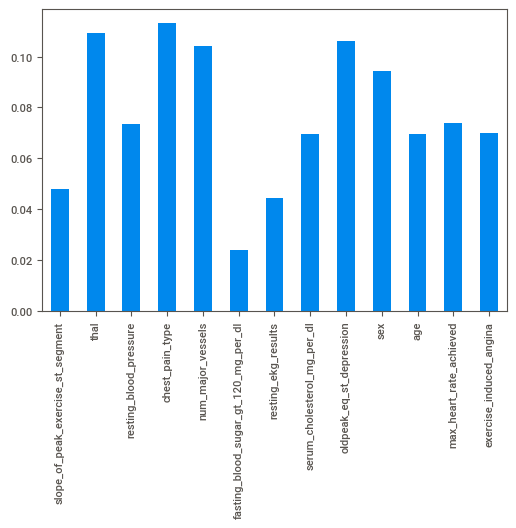

In [68]:
print(check_feat.feature_importances_)
feat_imp = pd.Series(check_feat.feature_importances_, index=train_data.columns[:-1])
feat_imp.plot(kind='bar')
plt.show()

Let's take all features

# Step 7 : Model Selection and Building

### Splitting train and test sets for modelling

In [69]:
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

print(X_train.shape, y_train.shape, '\n', X_test.shape, y_test.shape)

(160, 13) (160,) 
 (36, 13) (36,)


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, classification_report

In [71]:
models = []

models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('SVC',SVC()))
models.append(('GNB',GaussianNB()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('BC',BaggingClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('ABC',AdaBoostClassifier()))
models.append(('GBC',GradientBoostingClassifier()))
models.append(('XGBC',XGBClassifier()))
models.append(('MLPC',MLPClassifier()))

In [72]:
names=[]
results=[]
score = 'recall'
for name, model in models:
    pipeline = imbpipeline(steps=[['smote', SMOTE()],
                                 ['scaler', StandardScaler()],
                                 ['model', model]])
    kfold = StratifiedKFold(n_splits=5, shuffle=True)
    cv_result = cross_val_score(pipeline, X, y, scoring=score, cv=kfold)
    names.append(name)
    results.append(cv_result)
    msg = '%s: %f (%f)'%(name, cv_result.mean(), cv_result.std())
    print(msg, '\n', cv_result, '\n')

LR: 0.812500 (0.136931) 
 [0.9375 0.5625 0.8125 0.8125 0.9375] 

KNN: 0.775000 (0.075000) 
 [0.6875 0.8125 0.8125 0.6875 0.875 ] 

SVC: 0.762500 (0.072887) 
 [0.75   0.8125 0.6875 0.6875 0.875 ] 

GNB: 0.825000 (0.082916) 
 [0.875  0.8125 0.9375 0.8125 0.6875] 

DT: 0.737500 (0.046771) 
 [0.8125 0.75   0.6875 0.75   0.6875] 

BC: 0.700000 (0.025000) 
 [0.75   0.6875 0.6875 0.6875 0.6875] 

RF: 0.762500 (0.025000) 
 [0.75   0.8125 0.75   0.75   0.75  ] 

ABC: 0.725000 (0.145774) 
 [0.8125 0.5    0.9375 0.6875 0.6875] 

GBC: 0.712500 (0.050000) 
 [0.75   0.75   0.75   0.625  0.6875] 

[19:54:03] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:54:04] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default e

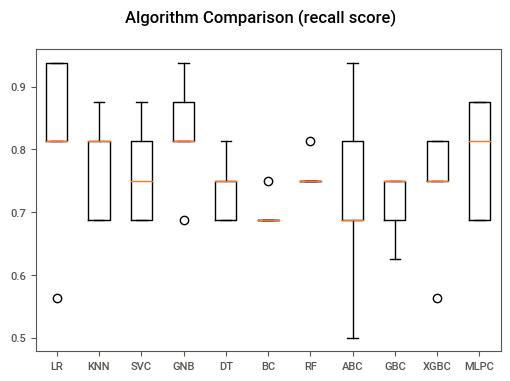

In [73]:
# algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison (recall score)')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

We can see our model's performance is not much good it is because of small dataset (size is 180 records). So our model may not be good enough, because complex algorithms applied to too-small datasets results in high variance and very high error on a test set which lead to overfitting, leading to misleadingly good results.

Let's keep going with GaussianNB which has better score compared to others i.e 0.825.

In [74]:
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)
model_gnb.score(X_train, y_train)

0.8125

### Performance before Hyperparameter tuning

In [75]:
y_pred = model_gnb.predict(X_test)
model_gnb.score(X_test, y_test)

0.7777777777777778

In [76]:
## recall_score
recall_score(y_test, y_pred)

0.9375

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.65      0.76        20
           1       0.68      0.94      0.79        16

    accuracy                           0.78        36
   macro avg       0.81      0.79      0.78        36
weighted avg       0.82      0.78      0.78        36



In [78]:
confusion_matrix(y_test, y_pred)

array([[13,  7],
       [ 1, 15]], dtype=int64)

# Step 8: Hyperparameter tuning

In [79]:
from sklearn.model_selection import GridSearchCV

param = {
    'var_smoothing':np.logspace(0, -9, num=100)
}

model = GaussianNB()
kfold = StratifiedKFold(n_splits=5, shuffle=True)
grid_cv = GridSearchCV(model, param_grid=param, verbose=1, cv=kfold, n_jobs=-1)

grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   11.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [80]:
grid_cv.best_score_

0.8125

In [81]:
grid_cv.best_params_

{'var_smoothing': 0.8111308307896871}

In [83]:
model_gnb_tnd = GaussianNB(var_smoothing=0.8111308307896871)
model_gnb_tnd.fit(X_train, y_train)
model_gnb_tnd.score(X_train, y_train)

0.8125

# Step 9: Final model evaluation with test data

In [84]:
## testing on tuned model

y_pred_tnd = model_gnb_tnd.predict(X_test)

In [85]:
print(classification_report(y_test, y_pred_tnd))

              precision    recall  f1-score   support

           0       0.94      0.75      0.83        20
           1       0.75      0.94      0.83        16

    accuracy                           0.83        36
   macro avg       0.84      0.84      0.83        36
weighted avg       0.85      0.83      0.83        36



In [86]:
confusion_matrix(y_test, y_pred_tnd)

array([[15,  5],
       [ 1, 15]], dtype=int64)

# Conclusion

We have build a Heart disease prediction classifier model. Since dataset is small model got only few training sample to learn that we saw during training and cross validation. Model has achieved much more better after hyperparameter tuning. On test set we got;
- accuracy: 0.83
- recall score (of 1): 0.94
- f1_score (of 1): 0.83
- precision score (of 1): 0.75

We can achieve even more scores if we have more number of records. 